<a href="https://colab.research.google.com/github/hanah0304/quest_repo/blob/main/DS2%EA%B8%B0_%ED%86%B5%EA%B3%84_%EB%A9%94%EC%9D%B8%ED%80%98%EC%8A%A4%ED%8A%B8_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8_%ED%95%9C%EC%95%84%EC%98%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# koreanize_matplotlib: 한글 텍스트가 그래프에 제대로 표시되도록 도와주는 패키지
!pip install koreanize-matplotlib
import koreanize_matplotlib

# 그래프를 더 높은 해상도로 표시하기 위한 설정
%config InlineBackend.figure_format = 'retina'

In [3]:
df = pd.read_parquet("https://github.com/corazzon/KaggleStruggle/raw/master/online-retail/data/online_retail.gzip")
df.shape

(541909, 8)

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
df.info()

# description, customerID 결측치 많음
# invoicedate 타입 카테고리->datetime 변경

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   InvoiceNo    541909 non-null  category
 1   StockCode    541909 non-null  category
 2   Description  540455 non-null  category
 3   Quantity     541909 non-null  int32   
 4   InvoiceDate  541909 non-null  category
 5   UnitPrice    541909 non-null  float64 
 6   CustomerID   406829 non-null  float32 
 7   Country      541909 non-null  category
dtypes: category(5), float32(1), float64(1), int32(1)
memory usage: 15.1 MB


## 미션 1) 모집단과 표본 추출을 하고 TotalPrice에 대해 비교해 주세요.
데이터셋에서 무작위로 1000개의 표본을 추출하고, 추출된 표본과 전체 데이터셋의 'TotalPrice'에 대해 평균과 표준편차를 비교하세요. \
이를 통해 모집단과 표본의 차이를 설명하고, 중심극한정리가 어떻게 적용되는지 설명하세요.

- pandas 의 sample 을 활용할 수 있으며, pandas 의 기술 통계 기능을 활용해 볼 수 있습니다.

아래의 코드를 활용하세요.

```python
# 주문 날짜 데이터 전처리
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"].astype(str))
df["InvoiceMonth"] = df["InvoiceDate"].dt.month

# 데이터 타입 변경
df["Country"] = df["Country"].astype(str)

# 주문 가격
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]
df.head()
```

In [6]:
# 주문 날짜 데이터 전처리
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"].astype(str))
df["InvoiceMonth"] = df["InvoiceDate"].dt.month

# 데이터 타입 변경
df["Country"] = df["Country"].astype(str)

# 주문 가격
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34


In [7]:
# 무작위 표본 1000개 추출
sample_df = df.sample(n=1000, random_state=1)

# 전체 데이터셋의 'TotalPrice' 평균과 표준편차 계산
total_mean = df['TotalPrice'].mean()
total_std = df['TotalPrice'].std()

# 추출된 표본의 'TotalPrice' 평균과 표준편차 계산
sample_mean = sample_df['TotalPrice'].mean()
sample_std = sample_df['TotalPrice'].std()

# 결과 출력
print(f"전체 데이터셋의 'TotalPrice' 평균: {total_mean:.2f}")
print(f"전체 데이터셋의 'TotalPrice' 표준편차: {total_std:.2f}")
print(f"표본 데이터셋의 'TotalPrice' 평균: {sample_mean:.2f}")
print(f"표본 데이터셋의 'TotalPrice' 표준편차: {sample_std:.2f}")

전체 데이터셋의 'TotalPrice' 평균: 17.99
전체 데이터셋의 'TotalPrice' 표준편차: 378.81
표본 데이터셋의 'TotalPrice' 평균: 16.26
표본 데이터셋의 'TotalPrice' 표준편차: 32.50


# ✅ 표본 추출 & 모집단과 비교 (w.중심극한정리)

(1) 모집단과 표본의 차이
- 모집단의 평균은 17.99, 표본의 평균은 16.26으로 표본의 평균이 1.73정도 낮아짐.
- 표준편차는 모집단 378.81, 표본 32.50로 매우 큰 차이를 보임.

(2) 중심극한정리
- 모집단의 분포가 어떤 형태이든지, 표본의 크기가 충분히 크다면 표본 평균의 분포가 정규 분포에 가까워진다는 정리.
- 현재 표본이 모집단의 특성을 제대로 반영하지 못하고 있으나, 표본이 더 커진다면 모집단과 평균 및 표준편차가 유사해지고, 분포 역시 모집단 평균에 더 가까운 정규 분포를 따르게 될 것입니다.

<br>
<br>

---



## 미션2) 'Country' 변수를 바탕으로 가장 빈도가 높은 두 개의 국가를 선택하고, 각 국가의 'TotalPrice' 평균에 차이가 있는지 검증하세요. 독립표본 t-검정을 사용하여 가설을 설정하고 검정하며, 1종 오류와 2종 오류에 대해 설명하세요.


* 미션 진행 방법
    <br>1) 데이터 로드 후 'TotalPrice'와 'Country' 컬럼을 찾아주세요.
    <br>2) 데이터셋에서 주문이 가장 많은 상위 두 국가를 찾아주세요.
    <br>3) 통계적 검증 수행하기
    <br>4) 각 국가의 'TotalPrice' 평균을 계산하세요.
    <br>5) 독립표본 t-검정을 사용하여 두 국가 간 'TotalPrice' 평균의 차이가 통계적으로 유의미한지 검증하세요. 이 때, scipy.stats 라이브러리의 ttest_ind 함수를 사용할 수 있습니다. equal_var=False 파라미터를 설정하여 두 집단의 분산이 다르다고 가정하세요.
    <br>6) t-통계량과 p-값을 해석하여 결과를 설명하세요. 1종 오류와 2종 오류의 개념을 설명하고, 해당 데이터셋에 적용하여 설명해 주세요.

In [8]:
# 국가별 등장 빈도 확인
df['Country'].value_counts()

# 가장 주문이 많은 상위 두 국가 : United Kingdom, Germany

Country
United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58


In [9]:
# 각 국가의 'TotalPrice' 평균 계산

# 'Country'가 'United Kingdom' 또는 'Germany'인 데이터만 필터링
filtered_df = df[df['Country'].isin(['United Kingdom', 'Germany'])]

# 각 국가별 'TotalPrice' 평균 계산
average_prices = filtered_df.groupby('Country')['TotalPrice'].mean()

# 결과 출력
print("United Kingdom과 Germany의 TotalPrice 평균:")
print(average_prices)

United Kingdom과 Germany의 TotalPrice 평균:
Country
Germany           23.348943
United Kingdom    16.525065
Name: TotalPrice, dtype: float64


In [10]:
# 독립표본 t-검정을 사용하여 두 국가 간 'TotalPrice' 평균의 차이가 통계적으로 유의미한지 검증
# 이 때, scipy.stats 라이브러리의 ttest_ind 함수를 사용
# equal_var=False 파라미터를 설정하여 두 집단의 분산이 다르다고 가정

from scipy import stats

# 각 국가별 TotalPrice 데이터 추출
uk_prices = filtered_df[filtered_df['Country'] == 'United Kingdom']['TotalPrice']
germany_prices = filtered_df[filtered_df['Country'] == 'Germany']['TotalPrice']

# 독립표본 t-검정 수행 (equal_var=False는 두 집단의 분산이 다르다고 가정)
t_statistic, p_value = stats.ttest_ind(uk_prices, germany_prices, equal_var=False)

# 결과 출력
print(f"t-통계량: {t_statistic:.4f}")
print(f"p-값: {p_value:.4f}")

# 유의수준 0.05에서의 결과 해석
alpha = 0.05
if p_value < alpha:
    print("평균 차이는 통계적으로 유의미합니다.")
else:
    print("평균 차이는 통계적으로 유의미하지 않습니다.")

t-통계량: -10.0464
p-값: 0.0000
평균 차이는 통계적으로 유의미합니다.


# ✅ 가장 빈도가 높은 두 개 국가의 'TotalPrice' 평균에 차이가 있는지 검증.
(1) t-통계량과 p-값을 해석하여 결과를 설명하세요.
- t-통계량: 두 집단의 평균 차이를 표본에서 관측된 차이의 크기와 표준오차를 고려하여 계산된 값
- t-통계량이 -10.0464이라는 것은 두 집단 간의 평균 차이가 매우 크다는 것을 의미함. 또한 이 값이 음수라는 것은 "United Kingdom"의 TotalPrice 평균이 "Germany"의 TotalPrice 평균보다 낮다는 것을 나타냄.
- p-값은 관측된 t-통계량 또는 더 극단적인 값이 우연히 발생할 확률을 나타냄.
- p-값이 0.0000이라는 것은 관측된 차이 또는 더 큰 차이가 우연히 발생할 확률이 거의 0에 가깝다는 것을 의미.
- 즉, 두 국가간 TotalPrice 평균 차이가 크고, 이것은 우연히 발생한 것이 아닌 실질적 차이가 있음을 시사.

(2) 1종 오류와 2종 오류의 개념을 설명하고, 해당 데이터셋에 적용하여 설명해 주세요.
- 1종 오류: 귀무가설이 참이지만 기각하는 오류. 즉, 실제로는 차이가 없는데, 차이가 있다고 잘못 결론 내리는 경우.
    - 귀무가설: "United Kingdom"과 "Germany" 간의 TotalPrice 평균 차이가 없다.
    - 결과 해석: p-값이 0.0000으로, 유의수준 0.05보다 훨씬 작기 때문에 귀무가설 기각
    - 1종 오류 발생 가능성: 실제로 두 집단 간에 TotalPrice 평균 차이가 없는데도 불구하고 평균 차이가 있다고 잘못 결론을 내릴 확률이 0.0000이라는 p-값에 의해 매우 낮음. 즉, 1종 오류를 범할 확률이 매우 작다.

- 2종 오류: 귀무가설이 거짓이지만 기각하지 않는 오류. 즉 실제로 차이가 있는데도 차이가 없다고 잘못 결론 내리는 경우.
    - 결과 해석: p-값이 0.0000이므로 실제로 평균 차이가 있다고 결론.
    - 2종 오류 발생 가능성: 2종 오류는 두 국가간 TotalPrice 평균 차이가 있음에도 차이가 없다고 결론을 내릴 경우 발생. 이 경우, p-값이 매우 낮기 때문에 2종 오류를 범할 확률은 높지 않음.

- 결론적으로, p-값이 매우 낮다는 것은 통계적 검정이 실제 차이를 잘 감지하고 있으며, 평균에 차이가 있다고 결론을 내릴 때 1종 오류와 2종 오류의 위험이 모두 적다는 것을 의미.

<br>
<br>


---



## 미션 3) 주중, 주말에 따른 기술통계와 분위수 분석

'UnitPrice'의 분포를 분석하기 위해 상자수염그림과 히스토그램을 그리세요. 데이터의 분위수, 중심경향치(평균, 중간값), 변산성(표준편차, 분산)을 계산하고, 이들이 데이터 분포에 대해 설명해 주세요. \
다음의 주어진 코드를 활용해 주세요.


```python
# 'InvoiceDate' 컬럼을 이용하여 주중과 주말을 구분
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek


df.loc[df['DayOfWeek'] <= 4, "WeekEnd"] = "주중"
df.loc[df['DayOfWeek'] > 4, "WeekEnd"] = "주말"

# 주중(월요일=0, 화요일=1, ..., 금요일=4)과 주말(토요일=5, 일요일=6)으로 데이터를 분리
weekday_data = df[df['DayOfWeek'] <= 4]  # 주중
weekend_data = df[df['DayOfWeek'] > 4]   # 주말
```

In [11]:
# 'InvoiceDate' 컬럼을 이용하여 주중과 주말을 구분
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek


df.loc[df['DayOfWeek'] <= 4, "WeekEnd"] = "주중"
df.loc[df['DayOfWeek'] > 4, "WeekEnd"] = "주말"
# 위 코드를 한줄로 쓰는 법: df['WeekEnd'] = df['DayOfWeek'].apply(lambda x: '주말' if x >= 5 else '주중')

# 주중(월요일=0, 화요일=1, ..., 금요일=4)과 주말(토요일=5, 일요일=6)으로 데이터를 분리
weekday_data = df[df['DayOfWeek'] <= 4]  # 주중
weekend_data = df[df['DayOfWeek'] > 4]   # 주말

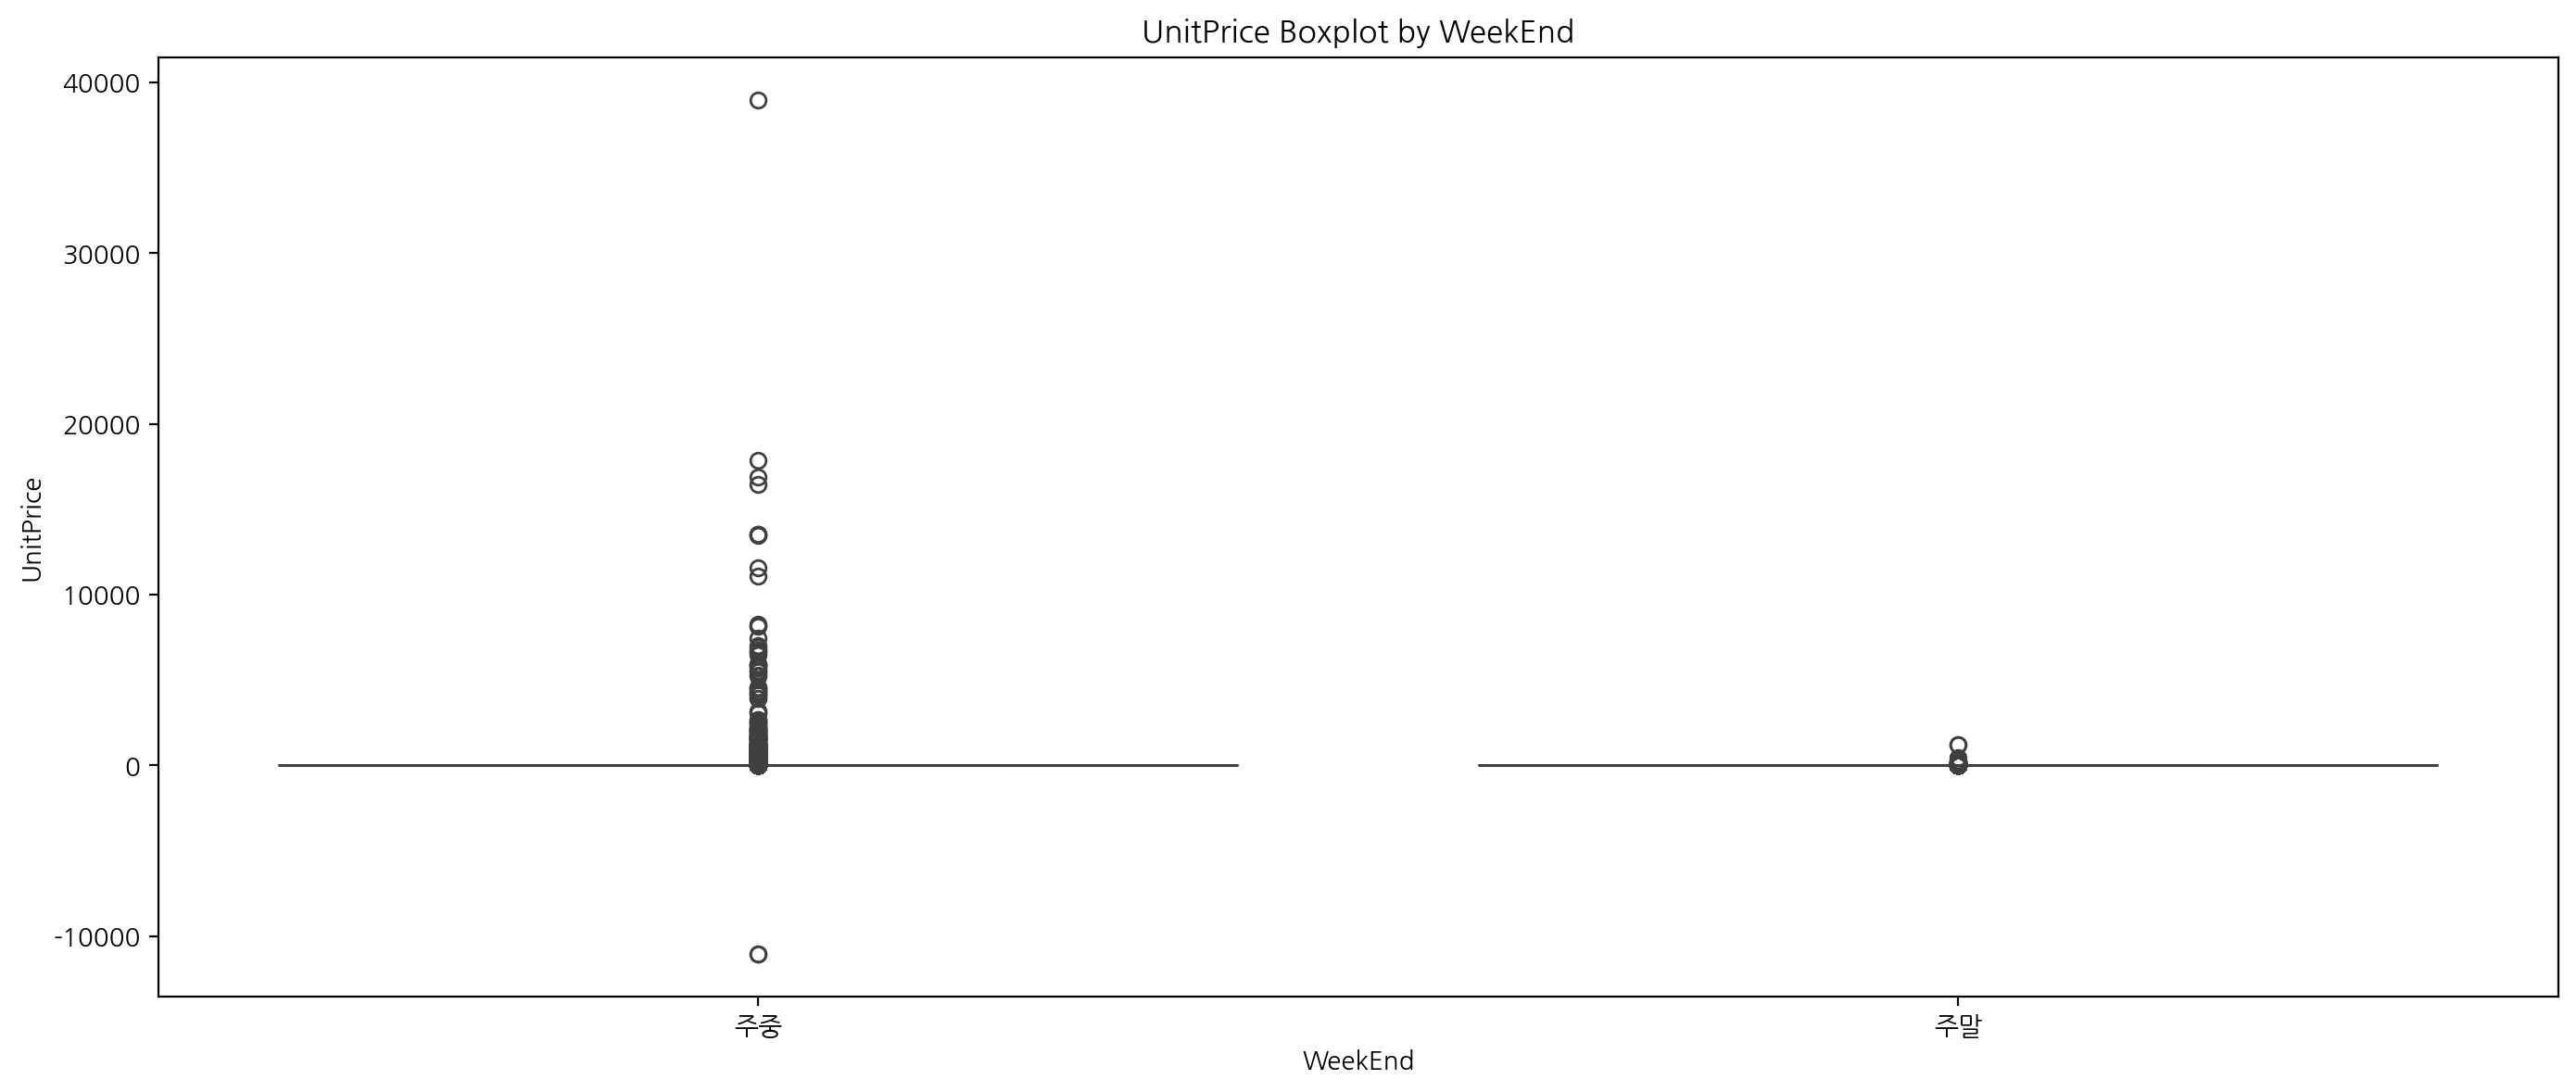

In [12]:
# 상자수염그림
plt.figure(figsize=(14, 6))
sns.boxplot(x='WeekEnd', y='UnitPrice', data=df)
plt.title('UnitPrice Boxplot by WeekEnd')
plt.tight_layout()
plt.show()

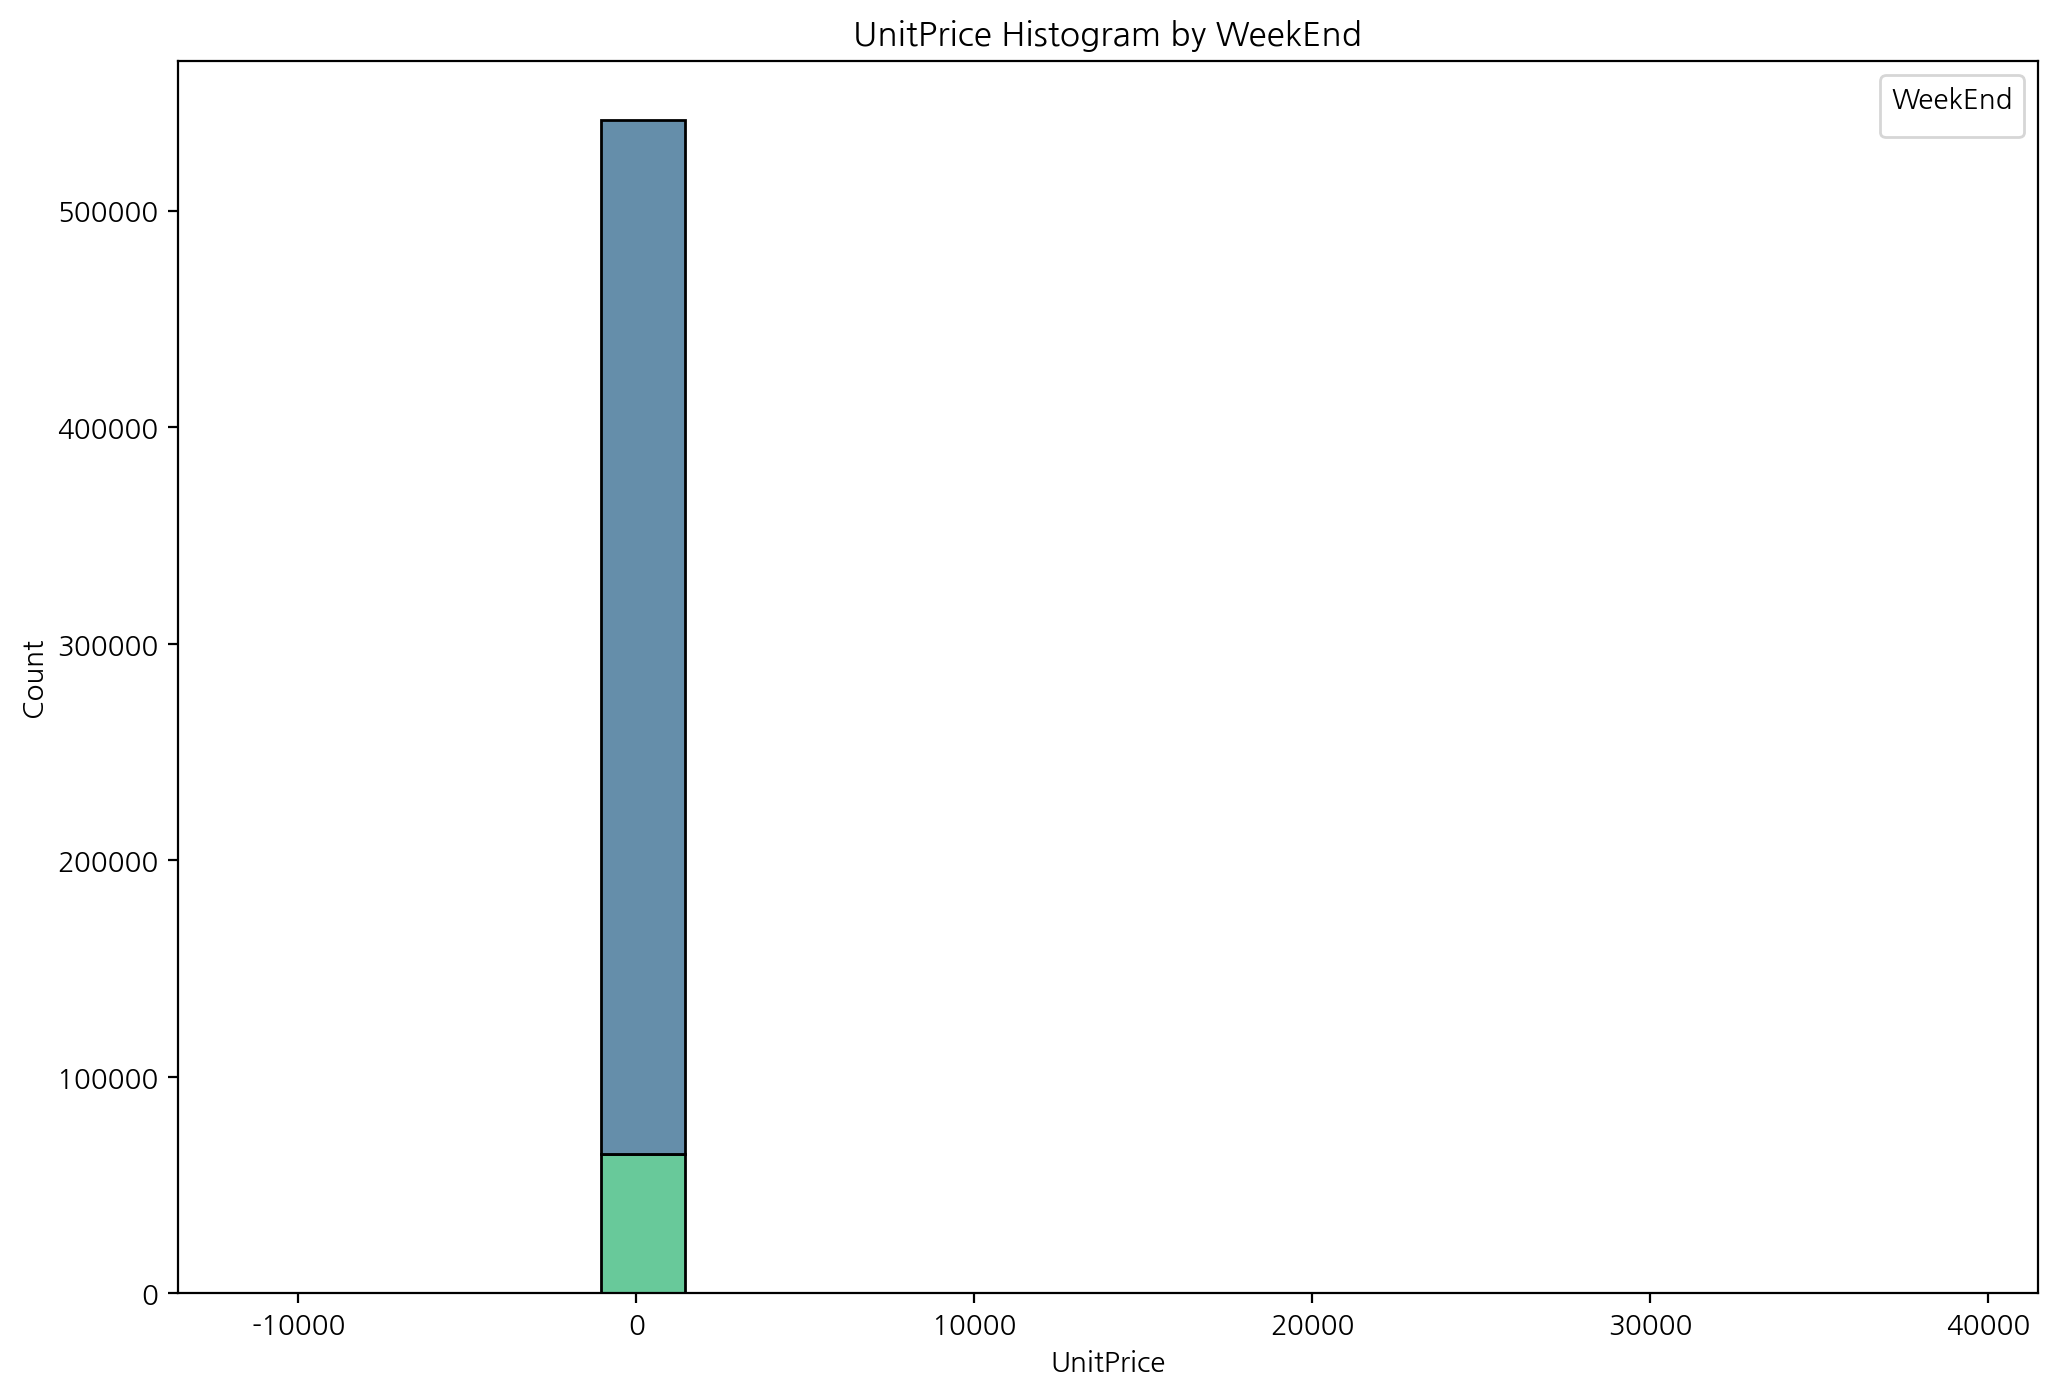

In [13]:
# 히스토그램

plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='UnitPrice', hue='WeekEnd', multiple='stack', palette='viridis', bins=20)

plt.title('UnitPrice Histogram by WeekEnd')
plt.legend(title='WeekEnd')
plt.xlabel('UnitPrice')
plt.show()

In [14]:
# 주중 UnitPrice 기술통계
weekday_stats = weekday_data['UnitPrice'].describe()

# 주말 UnitPrice 기술통계
weekend_stats = weekend_data['UnitPrice'].describe()

# 결과 출력
print("주중 UnitPrice 기술통계:")
print(weekday_stats)

print("\n주말 UnitPrice 기술통계:")
print(weekend_stats)

주중 UnitPrice 기술통계:
count    477534.000000
mean          4.843425
std         103.032058
min      -11062.060000
25%           1.250000
50%           2.100000
75%           4.130000
max       38970.000000
Name: UnitPrice, dtype: float64

주말 UnitPrice 기술통계:
count    64375.000000
mean         2.887824
std          7.959497
min          0.000000
25%          1.250000
50%          1.850000
75%          3.750000
max       1236.750000
Name: UnitPrice, dtype: float64


In [15]:
# 이상해보이는 unitprice 세부 내용 확인해보기
df.sort_values(by='UnitPrice', ascending=True).head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,TotalPrice,DayOfWeek,WeekEnd
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom,8,-11062.06,4,주중
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom,8,-11062.06,4,주중
40984,539750,22652,TRAVEL SEWING KIT,1,2010-12-21 15:40:00,0.00,NaN,United Kingdom,12,0.00,1,주중
52217,540696,84562A,NaN,1,2011-01-11 09:14:00,0.00,NaN,United Kingdom,1,0.00,1,주중
52262,540699,POST,NaN,1000,2011-01-11 09:32:00,0.00,NaN,United Kingdom,1,0.00,1,주중
344867,567113,85215,Damaged,-29,2011-09-16 13:39:00,0.00,NaN,United Kingdom,9,-0.00,4,주중
204945,554696,85016,NaN,5,2011-05-25 17:14:00,0.00,NaN,United Kingdom,5,0.00,2,주중
104419,545176,18098C,PORCELAIN BUTTERFLY OIL BURNER,6,2011-02-28 14:19:00,0.00,NaN,United Kingdom,2,0.00,0,주중
104418,545176,20615,BLUE POLKADOT PASSPORT COVER,3,2011-02-28 14:19:00,0.00,NaN,United Kingdom,2,0.00,0,주중
115488,546124,35610C,Thrown away.,-1121,2011-03-09 14:50:00,0.00,NaN,United Kingdom,3,-0.00,2,주중


In [16]:
df[df['UnitPrice'] > 20000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,TotalPrice,DayOfWeek,WeekEnd
222681,C556445,M,Manual,-1,2011-06-10 15:31:00,38970.0,15098.0,United Kingdom,6,-38970.0,4,주중


In [14]:
# 이상치 제거(IQR)
# IQR 계산 및 이상치 제거
Q1 = df['UnitPrice'].quantile(0.25)
Q3 = df['UnitPrice'].quantile(0.75)
IQR = Q3 - Q1

# IQR의 1.5배 범위를 벗어나는 이상치 제거
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치가 아닌 데이터만 선택
df_cleaned = df[(df['UnitPrice'] >= lower_bound) & (df['UnitPrice'] <= upper_bound)]

print(f"원래 데이터 개수: {len(df)}")
print(f"이상치 제거 후 데이터 개수: {len(df_cleaned)}")

원래 데이터 개수: 541909
이상치 제거 후 데이터 개수: 502282


In [15]:
df_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,TotalPrice,DayOfWeek,WeekEnd
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,15.30,2,주중
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34,2,주중
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,22.00,2,주중
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34,2,주중
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34,2,주중


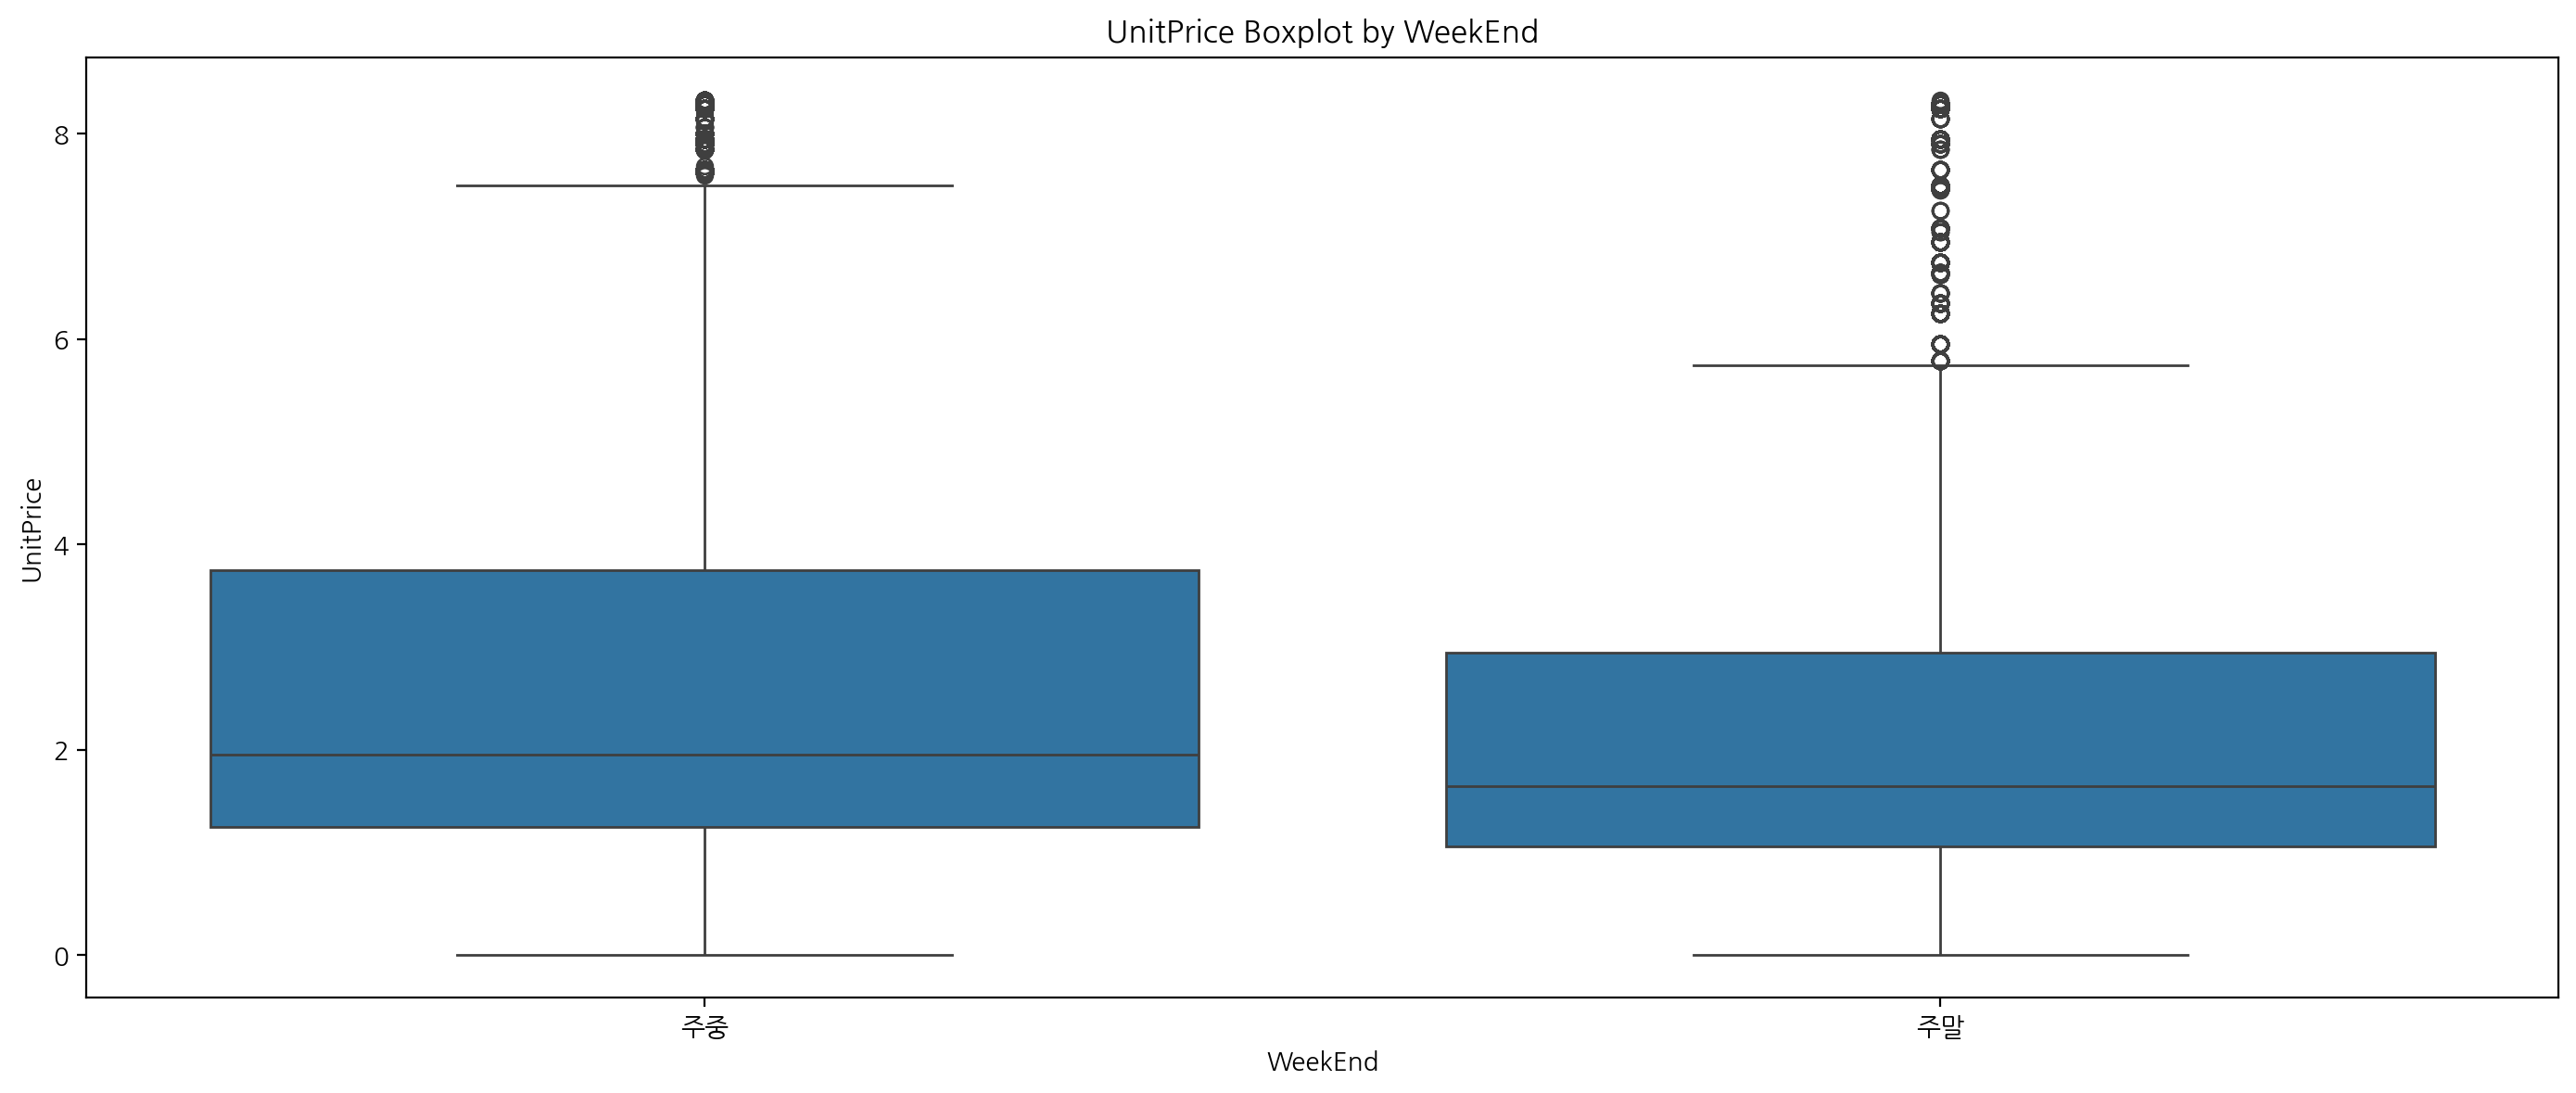

In [16]:
# 상자수염그림 다시 그려보기
plt.figure(figsize=(14, 6))

sns.boxplot(x='WeekEnd', y='UnitPrice', data=df_cleaned)
plt.title('UnitPrice Boxplot by WeekEnd')
plt.tight_layout()
plt.show()

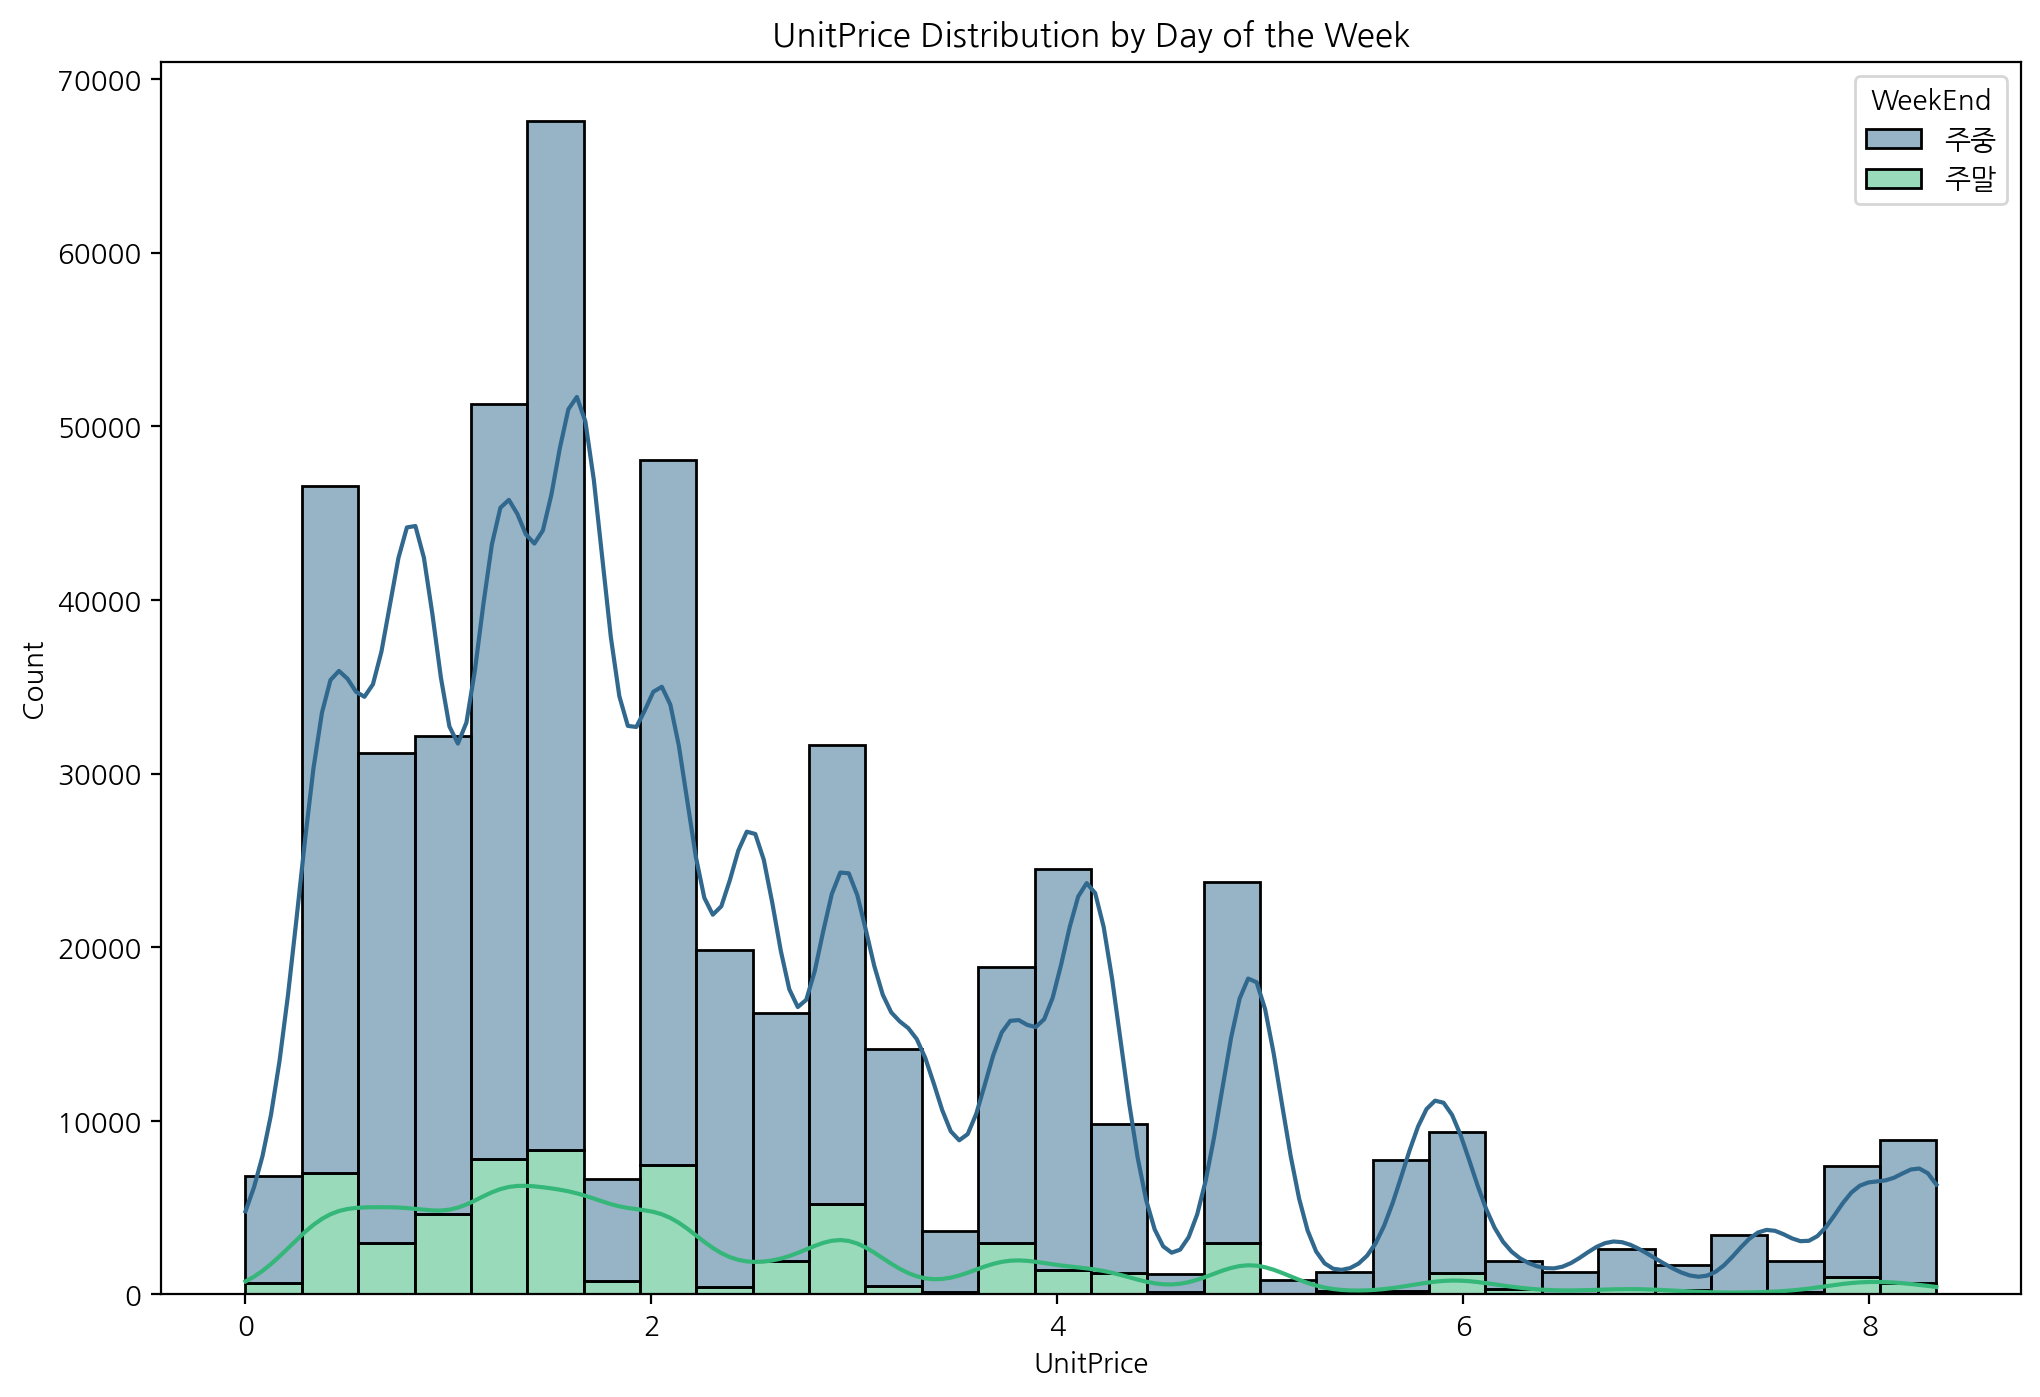

In [26]:
# 주중,주말에 따른 UnitPrice 분포 히스토그램 다시 그리기
plt.figure(figsize=(12, 8))
sns.histplot(data=df_cleaned, x='UnitPrice', hue='WeekEnd', kde=True, multiple='stack', palette='viridis', bins=30)
plt.title('UnitPrice Distribution by Day of the Week')
plt.xlabel('UnitPrice')
plt.ylabel('Count')
plt.show()


In [27]:
# 주중,주말 데이터 업데이트
weekday_data = df_cleaned[df_cleaned['DayOfWeek'] <= 4]  # 주중
weekend_data = df_cleaned[df_cleaned['DayOfWeek'] > 4]   # 주말

# 주중 UnitPrice 기술통계
weekday_stats = weekday_data['UnitPrice'].describe()

# 주말 UnitPrice 기술통계
weekend_stats = weekend_data['UnitPrice'].describe()

# 결과 출력
print("주중 UnitPrice 기술통계:")
print(weekday_stats)

print("\n주말 UnitPrice 기술통계:")
print(weekend_stats)

주중 UnitPrice 기술통계:
count    441352.000000
mean          2.552716
std           1.931074
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max           8.330000
Name: UnitPrice, dtype: float64

주말 UnitPrice 기술통계:
count    60930.000000
mean         2.303662
std          1.802483
min          0.000000
25%          1.060000
50%          1.650000
75%          2.950000
max          8.330000
Name: UnitPrice, dtype: float64


# ✅ 주중, 주말에 따른 기술통계와 분위수 분석
[이상치 제거 전]
- 주중: 평균 4.8, 표준편차 103, 최대 38970, 최소 -11062로 이상해보이는 값이 많음.
- 주말: 평균 2.8, 표준편차 7.9, 3분위 지점이 3.75로 대부분의 값이 1~3 사이에 몰려있으나, 최대값이 1236으로 지나치게 차이가 많이 나므로 추가 확인 필요.

[이상치 제거 후]
- 주중: 평균 2.5, 표준편차 1.9, Q1 1.25, Q2 1.95, Q3 3.75
- 주말: 평균 2.3, 표준편차 1.8, Q1 1.06, Q2 1.65, Q3 2.95

[해석]
- 주중 평균 단가가 주말보다 약간 높은 경향이 있음
- 주중 표준편차가 주말보다 조금 더 큼. 즉 주중 단가 분포가 주말보다 다소 더 분산되어 있음.
- 주중과 주말의 분포가 유사하지만, Q3의 차이로 보아 주말에 비해 주중 평균 단가가 상대적으로 높은 경향.
<br>
<br>


---




## 미션4) 심슨의 역설을 설명하기 위한 구체적인 분석을 다음의 순서로 진행해 주세요.

심슨의 역설(Simpson's Paradox)은 통계 데이터를 해석할 때 발생할 수 있는 현상으로, 일부 하위 그룹에서 관찰된 추세가 전체 데이터를 합쳤을 때 반전될 수 있음을 나타냅니다. 이 현상은 복잡한 데이터에서 하위 그룹 간에 상이한 분포나 크기 때문에 발생할 수 있습니다.

심슨의 역설을 설명하기 위해서는, 데이터 내에서 서로 상반된 추세를 보이는 하위 그룹을 찾거나 생성해야 합니다. 예를 들어, 특정 상품의 판매량이나 단가가 국가별로 다른 추세를 보이는지, 혹은 특정 기간 동안의 판매 추세가 전체 기간 동안의 추세와 다른지 등을 분석할 수 있습니다.

데이터를 제시한 특정 국가로 하위 그룹으로 나눕니다.
각 하위 그룹에서 총 판매금액의 추세를 분석합니다.
전체 데이터셋에 대해 동일한 지표를 분석합니다.
하위 그룹의 추세와 전체 데이터의 추세가 서로 다른 방향성을 보일 경우, 이를 통해 심슨의 역설을 설명합니다.
이러한 분석을 위해, 데이터 내에서 적절한 변수와 하위 그룹을 선정하는 것이 중요합니다. 현재 제공된 데이터만으로는 심슨의 역설을 바로 설명할 수 있는 명확한 예시를 찾기 어려울 수 있지만, 데이터를 깊이 분석하면 관련 현상을 발견할 수도 있습니다.
이를 이용해 비즈니스에 어떻게 활용할 수 있을지도 설명해 주세요.

```python
country_group = ["Japan", "Hong Kong", "Singapore", "Lebanon", "Canada", "USA"]
```

In [29]:
country_group = ["Japan", "Hong Kong", "Singapore", "Lebanon", "Canada", "USA"]

In [35]:
# 국가별로 데이터 필터링
group_data = df_cleaned[df_cleaned['Country'].isin(country_group)]

# 전체 데이터셋 분석을 위해 전체 총 판매금액 계산
total_sales_all = df_cleaned.groupby('InvoiceMonth')['TotalPrice'].sum().reset_index()

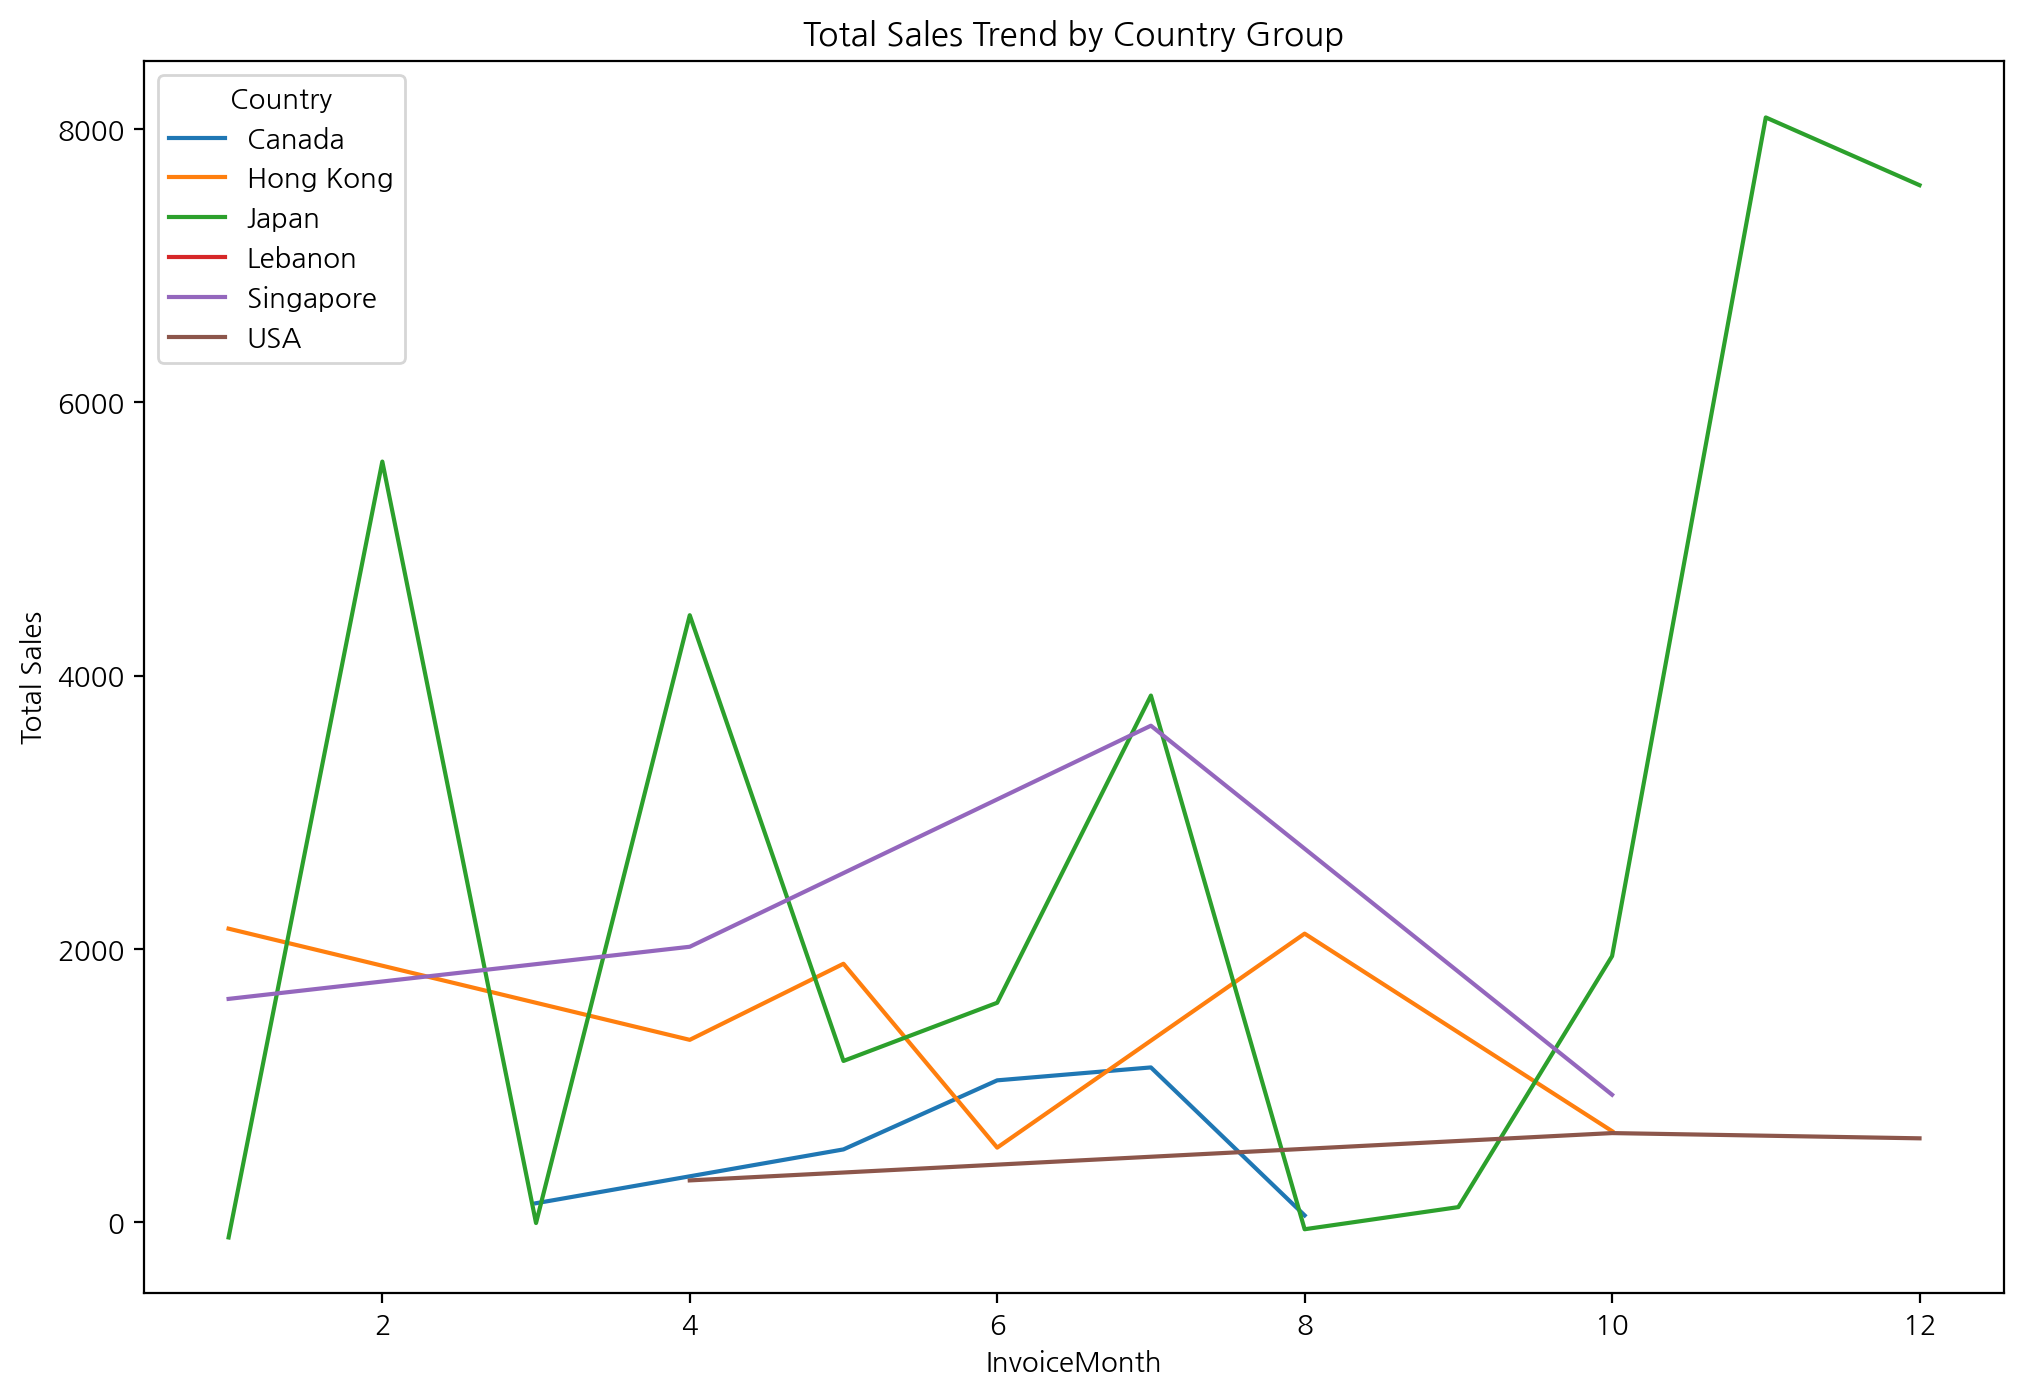

In [33]:
# 하위 그룹의 총 판매금액 계산
total_sales_group = group_data.groupby(['Country', 'InvoiceMonth'])['TotalPrice'].sum().reset_index()

# 하위 그룹별 총 판매금액 추세 시각화
plt.figure(figsize=(12, 8))
sns.lineplot(data=total_sales_group, x='InvoiceMonth', y='TotalPrice', hue='Country')
plt.title('Total Sales Trend by Country Group')
plt.xlabel('InvoiceMonth')
plt.ylabel('Total Sales')
plt.legend(title='Country')
plt.show()

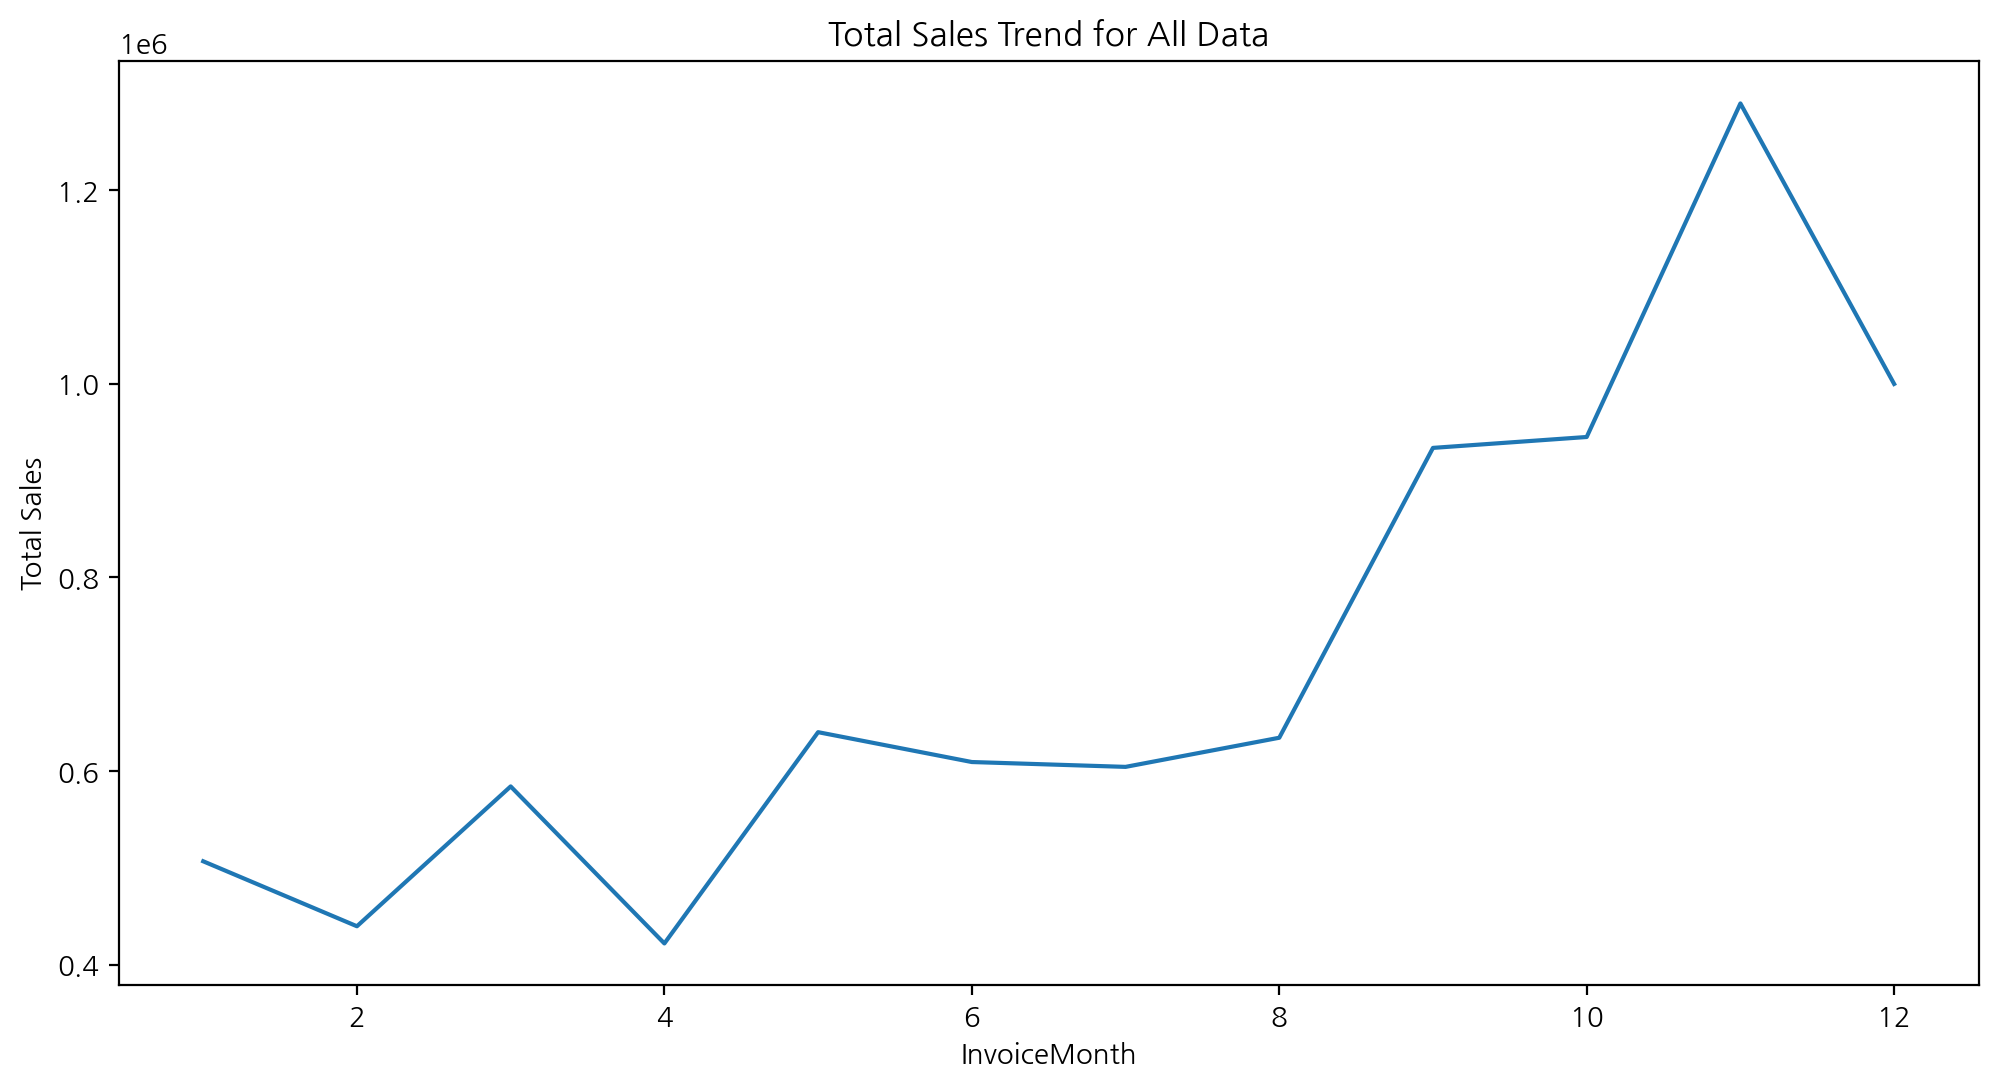

In [36]:
# 전체 데이터셋의 총 판매금액 추세 시각화
plt.figure(figsize=(12, 6))
sns.lineplot(data=total_sales_all, x='InvoiceMonth', y='TotalPrice')
plt.title('Total Sales Trend for All Data')
plt.xlabel('InvoiceMonth')
plt.ylabel('Total Sales')
plt.show()

# ✅ 심슨의 역설 확인 내용 및 비즈니스 활용 방안
### 추세 비교를 통해 확인한 심슨의 역설
- 전체 데이터셋에서는 2,4월 판매금액이 줄어드는 경향을 보임. 그러나 일본 개별 국가 기준 판매금액을 확인해보았을 때, 2&4월이 오히려 상승하는 추세를 보여 심슨의 역설을 확인.
- 또한 전체 데이터셋의 경우 연말이 될수록 총 판매 금액이 최고점에 달하는 모습을 보였으나, 지정된 하위 그룹들의 개별 데이터에서는 일본을 제외한 어떤 국가도 비슷한 추이를 볼 수 없었음.


### 비즈니스 활용 방안
- 특정 국가의 매출이 눈에 띄게 좋거나 나쁠때, 혹은 전체 추이와 다르게 움직일 때, 해당 국가에 특별한 이벤트나 사건이 있었는지 요인 확인 후 타 국가에 확대 적용 가능한 인사이트 발굴 시 벤치마킹.
- 매출이 활발한 시즌에는 크로스셀링이 가능한 제품 추천 알고리즘 강화하여 추가 이익 극대화 도모.
- 매출이 낮은 시즌에는 무료 배송, 추가 쿠폰 등의 프로모션 통하여 매출 방어 전략 수립

<br>
<br>


---



## 미션5) 상품의 단가와 총 판매액의 관계를 분석해 주세요.

상품의 단가가 총 판매액에 미치는 영향을 이해하고 예측하는 것입니다. 이 분석은 가격 결정 전략을 개선하고, 수익성을 최대화하기 위해 사용될 수 있습니다.
높은 단가의 상품이 더 많은 총 판매액을 생성할 것이라는 가설을 설정합니다.

1) 데이터 전처리: 필요한 데이터를 정리하고, 결측치를 제거합니다.\
2) 단순 회귀분석: 단가(UnitPrice)를 독립변수로, 총 판매액(TotalPrice)을 종속변수로 설정하여 회귀분석을 수행합니다.\
3) 결과 해석: 회귀계수와 결정계수를 분석하여 상품 가격과 총 판매액 사이의 관계를 해석합니다.

In [37]:
# 결측치 확인
df_cleaned.isnull().sum()

# 단가랑 판매액은 결측치 없으니까 그냥 가보기~

InvoiceNo            0
StockCode            0
Description       1454
Quantity             0
InvoiceDate          0
UnitPrice            0
CustomerID      119571
Country              0
InvoiceMonth         0
TotalPrice           0
DayOfWeek            0
WeekEnd              0
dtype: int64

In [39]:
# 단순 회귀분석
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# 독립변수(X)와 종속변수(y) 설정
X = df_cleaned[['UnitPrice']]
y = df_cleaned['TotalPrice']

# 회귀모델 생성 및 학습
model = LinearRegression()
model.fit(X, y)

# 회귀계수와 절편
coef = model.coef_[0]
intercept = model.intercept_

# 예측
y_pred = model.predict(X)

# 결정계수 (R^2)
r2 = r2_score(y, y_pred)

# 3) 결과 해석
print(f"회귀계수 (UnitPrice에 대한 계수): {coef}")
print(f"절편: {intercept}")
print(f"결정계수 (R^2): {r2}")

회귀계수 (UnitPrice에 대한 계수): 1.8826421113640026
절편: 12.387983262217825
결정계수 (R^2): 9.244830754406852e-05


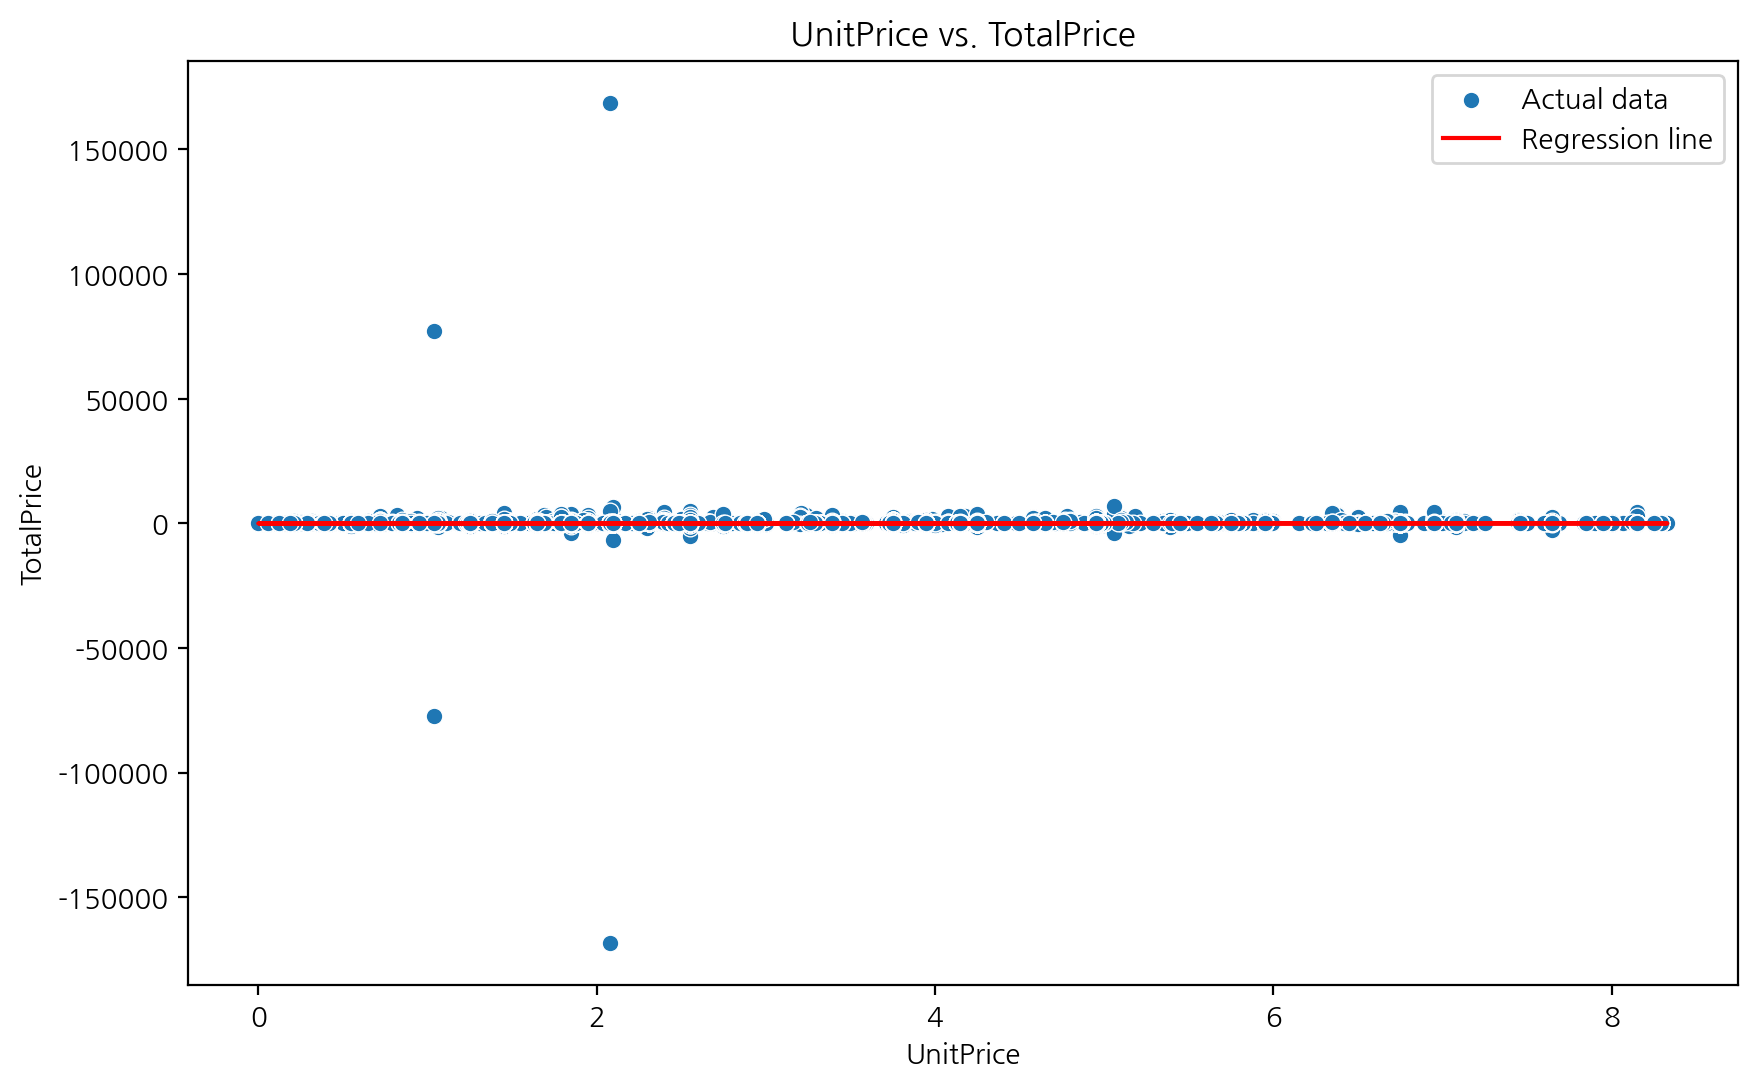

In [40]:
# 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(x='UnitPrice', y='TotalPrice', data=df_cleaned, label='Actual data')
plt.plot(df_cleaned['UnitPrice'], y_pred, color='red', label='Regression line')
plt.title('UnitPrice vs. TotalPrice')
plt.xlabel('UnitPrice')
plt.ylabel('TotalPrice')
plt.legend()
plt.show()

# ✅ 상품 가격 & 총 판매액 회귀분석 결과 해석

## (1) 회귀계수
- 결과: 1.8826
- 의미: 단가가 총 판매액에 미치는 영향
- 해석: 단가가 1단위 증가할 때 총 판매액이 약 1.88단위 증가한다. 즉, 단가가 높아질수록 판매액이 증가하는 경향이 있다고 할 수 있음. (그러나 이 관계가 실제로 의미 있는지 확인하려면 결정계수를 함께 확인해야함.)

## (2) 결정계수 (R^2)
- 결과: 9.244830754406852e-05(즉, 0.000092448)
- 의미: 회귀 모델이 종속변수의 변동성을 어마나 설명하는지 나타내는 지표.
- 해석: 결정계수가 매우 작으므로 모델이 단가와 총 판매액 사이의 관계를 거의 설명하지 못한다고 할 수 있음. 단가가 아닌 다른 변수들이 총 판매액에 영향을 미칠 것으로 추측됨.

<br>
<br>

---



## 미션6) 여러 분은 크리스마스가 온라인 소매 판매에 미치는 영향을 평가하고, 이를 바탕으로 더 효과적인 가격 및 프로모션 전략을 개발해야 합니다.  

* 다음과 같은 비즈니스 전략을 고려하여 인과 분석을 합니다. 증거의 사다리로 데이터에서 얻을 수 있는 증거의 강도를 평가합니다. 크리스마스 관련 상품과 비관련 상품 간의 판매 차이를 분석합니다.


* 프로모션 전략
    * 크리스마스 상품 프로모션 강화하여 크리스마스 관련 상품의 판매를 증진시키기 위한 특별 프로모션을 개발합니다.
    * 대상 고객을 세분화하여 크리스마스 상품에 관심이 높은 고객 세그먼트를 식별하고, 이들을 대상으로 한 마케팅 캠페인을 실행합니다.
* 재고 및 공급망 관리
    * 재고 최적화를 통해 크리스마스 시즌에 대한 수요 예측을 바탕으로 재고 수준을 조절합니다.
    * 공급망 효율화를 통해 시즌별 수요 변화에 따라 공급망을 조정하여 비용을 최소화하고, 고객 만족도를 높입니다.
* 상품 다양화
    * 상품 포트폴리오를 확장하여 크리스마스 관련 상품뿐만 아니라, 다른 시즌 상품에도 주목하여 상품 포트폴리오를 다양화합니다

* 크리스마스 시즌 동안 프로모션과 상품 가격 전략이 판매에 미치는 영향을 분석하여, 미래의 프로모션 및 가격 전략을 최적화해야 합니다.



* 다음 주어진 코드를 활용합니다.


```python
# 2011년 이전 데이터만 사용합니다.
# 프로모션 여부와 시간에 따른 데이터 분리
df_promotion = df[(df["InvoiceDate"] < "2011-01-01") & df["Description"].notnull()].dropna().copy()
df_promotion["IsChristmasPeriod"] = (df_promotion["InvoiceDate"] >= "2010-12-17") & (df_promotion["InvoiceDate"] <= "2010-12-24")
df_promotion["IsChristmasProduct"] = df_promotion["Description"].str.lower().str.contains("christmas")
```

In [42]:
# total price 음수나 0인 데이터 삭제
df_cleaned = df_cleaned[df_cleaned['TotalPrice'] > 0]

In [50]:
# IQR을 사용하여 이상치 제거
# 데이터프레임 df_cleaned에서 'UnitPrice' 컬럼의 IQR을 계산.

# 1사분위수(Q1)와 3사분위수(Q3) 계산
Q1 = df_cleaned['UnitPrice'].quantile(0.25)
Q3 = df_cleaned['UnitPrice'].quantile(0.75)

# IQR 계산
IQR = Q3 - Q1

# 이상치 경계 설정
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치 제거
df_no_outliers = df_cleaned[(df_cleaned['UnitPrice'] >= lower_bound) & (df_cleaned['UnitPrice'] <= upper_bound)]

# 기술통계 계산
print("이상치 제거 후 UnitPrice의 기술통계:")
print(df_no_outliers['UnitPrice'].describe())

이상치 제거 후 UnitPrice의 기술통계:
count    474890.000000
mean          2.330366
std           1.622801
min           0.001000
25%           1.250000
50%           1.950000
75%           3.290000
max           7.500000
Name: UnitPrice, dtype: float64


In [53]:
# 데이터프레임 df_cleaned에서 'UnitPrice' 컬럼의 IQR을 계산.

# 1사분위수(Q1)와 3사분위수(Q3) 계산
Q1 = df_cleaned['TotalPrice'].quantile(0.25)
Q3 = df_cleaned['TotalPrice'].quantile(0.75)

# IQR 계산
IQR = Q3 - Q1

# 이상치 경계 설정
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치 제거
df_no_outliers = df_cleaned[(df_cleaned['TotalPrice'] >= lower_bound) & (df_cleaned['TotalPrice'] <= upper_bound)]

# 기술통계 계산
print("이상치 제거 후 TotalPrice의 기술통계:")
print(df_no_outliers['TotalPrice'].describe())

이상치 제거 후 TotalPrice의 기술통계:
count    455881.000000
mean          9.953111
std           8.089848
min           0.001000
25%           3.290000
50%           7.530000
75%          15.000000
max          37.400000
Name: TotalPrice, dtype: float64


In [78]:
df_no_outliers['InvoiceDate'].value_counts().sort_index()

InvoiceDate
2010-12-01 08:26:00     7
2010-12-01 08:28:00     2
2010-12-01 08:34:00    14
2010-12-01 08:35:00     1
2010-12-01 08:45:00     7
                       ..
2011-12-09 12:20:00    26
2011-12-09 12:21:00     2
2011-12-09 12:31:00    21
2011-12-09 12:49:00     2
2011-12-09 12:50:00    15
Name: count, Length: 16629, dtype: int64

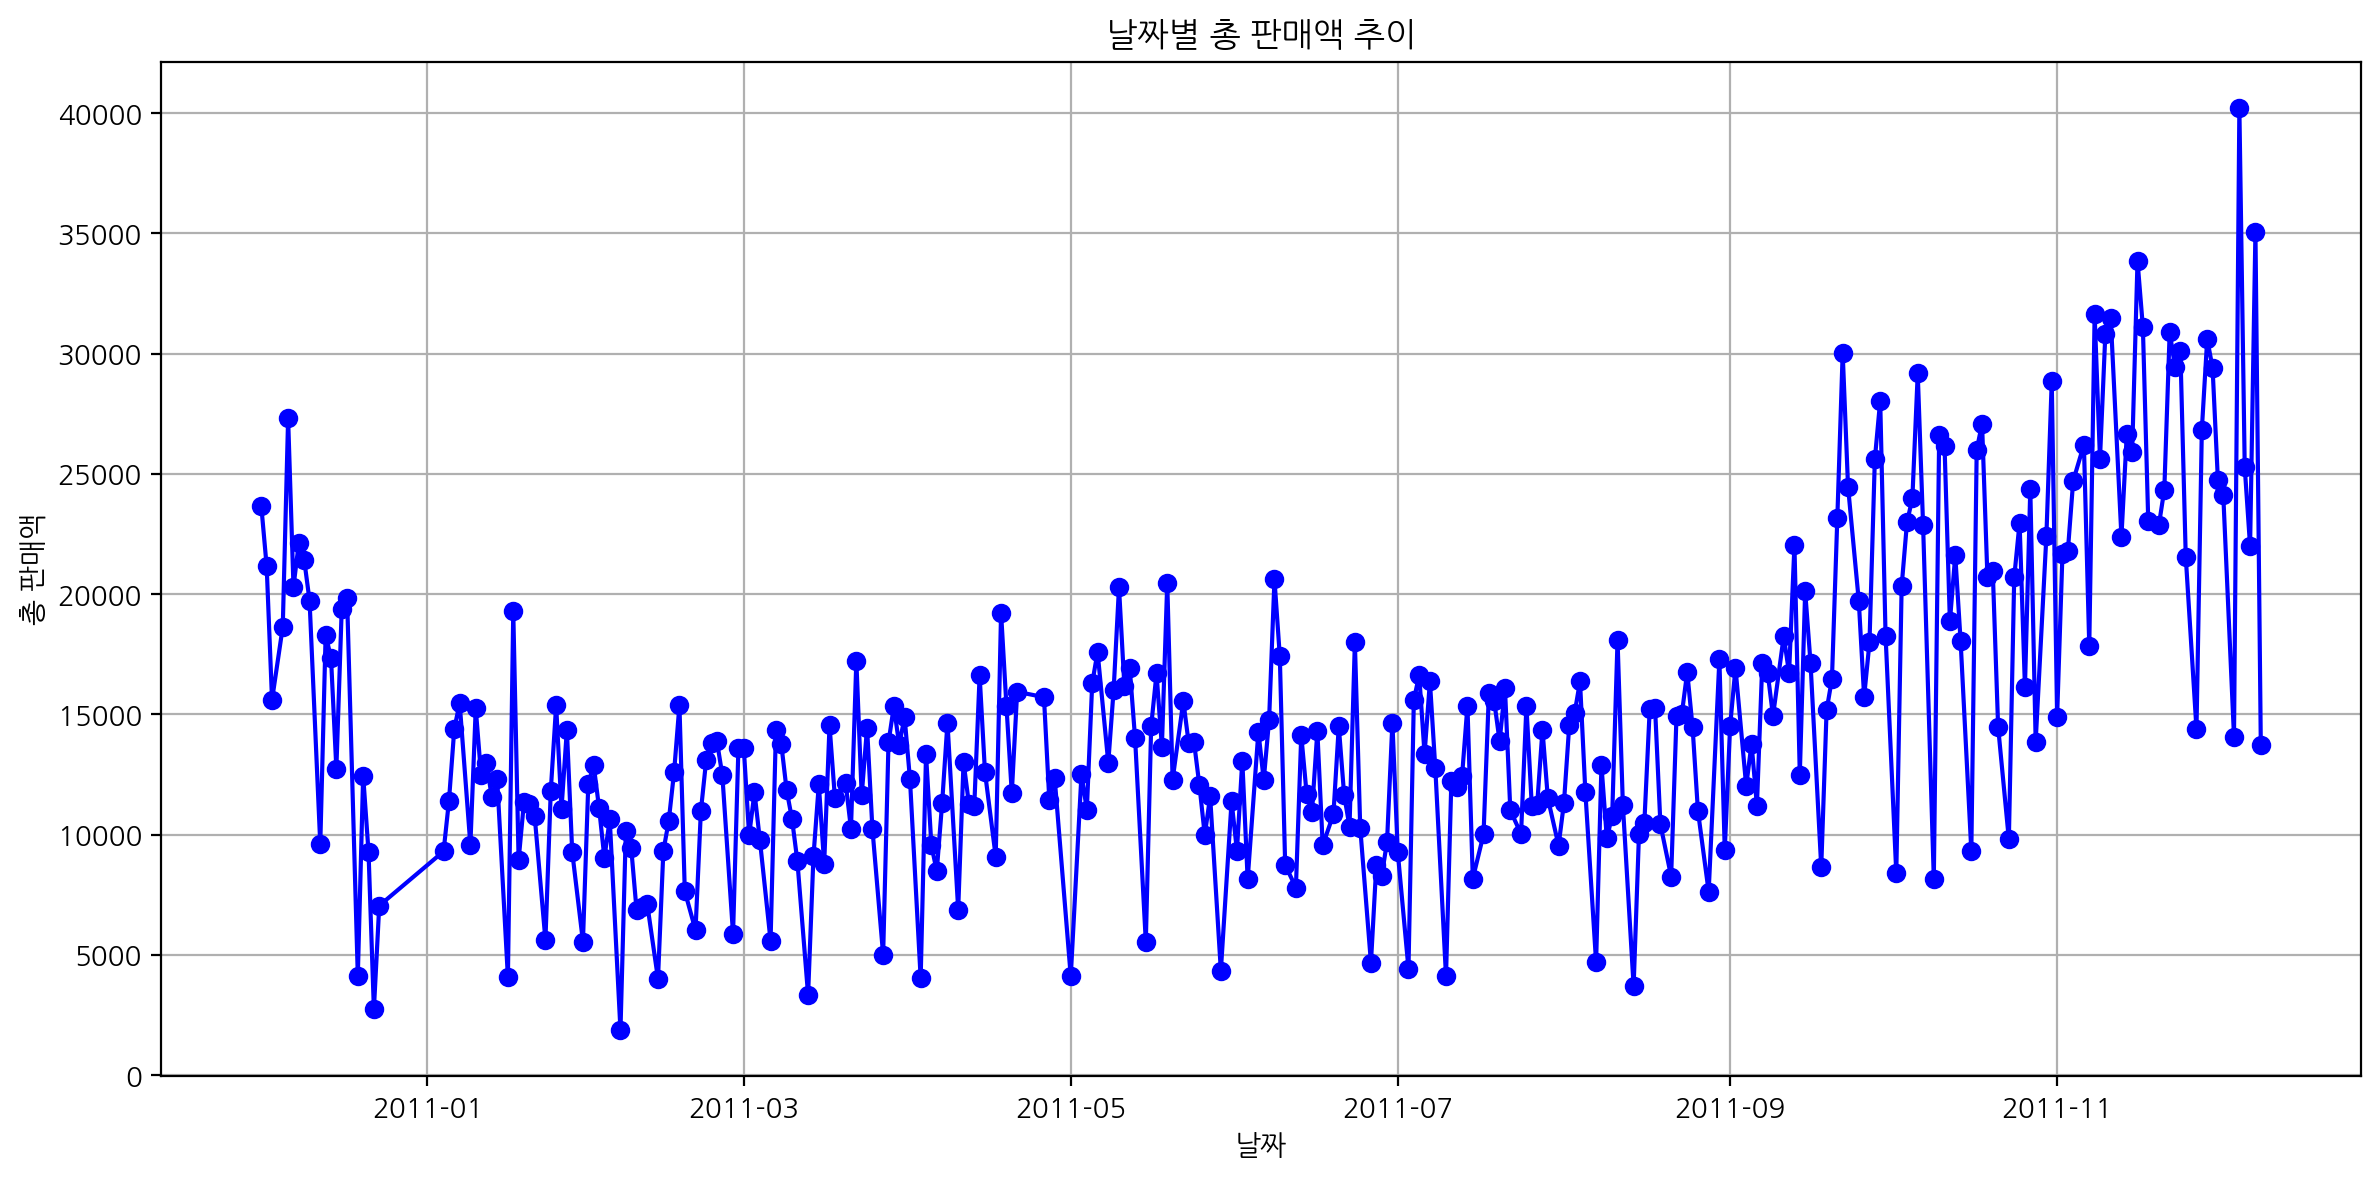

In [79]:
# 날짜별로 그룹화하여 총 판매액 계산
daily_sales = df_no_outliers.groupby(df_no_outliers['InvoiceDate'].dt.date)['TotalPrice'].sum()

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(daily_sales.index, daily_sales.values, marker='o', linestyle='-', color='b')
plt.title('날짜별 총 판매액 추이')
plt.xlabel('날짜')
plt.ylabel('총 판매액')
plt.grid(True)
plt.tight_layout()
plt.show()

In [54]:
# 데이터 필터링: 2011년 이전 데이터만 사용
df_promotion = df_no_outliers[(df_no_outliers["InvoiceDate"] < "2011-01-01") & df_no_outliers["Description"].notnull()].dropna().copy()

# 크리스마스 기간 여부와 크리스마스 관련 상품 여부를 추가
df_promotion["IsChristmasPeriod"] = (df_promotion["InvoiceDate"] >= "2010-12-17") & (df_promotion["InvoiceDate"] <= "2010-12-24")
df_promotion["IsChristmasProduct"] = df_promotion["Description"].str.lower().str.contains("christmas")

# 크리스마스 기간과 비크리스마스 기간의 총 판매액 비교
df_promotion['TotalPrice'] = df_promotion['UnitPrice'] * df_promotion['Quantity']
cristmas_sales = df_promotion[df_promotion['IsChristmasPeriod']]['TotalPrice']
non_cristmas_sales = df_promotion[~df_promotion['IsChristmasPeriod']]['TotalPrice']

# 기술통계 계산
print("크리스마스 기간의 총 판매액 기술통계:")
print(cristmas_sales.describe())

print("\n비크리스마스 기간의 총 판매액 기술통계:")
print(non_cristmas_sales.describe())

크리스마스 기간의 총 판매액 기술통계:
count    2452.000000
mean       12.428564
std         8.713954
min         0.420000
25%         4.650000
50%        11.800000
75%        17.700000
max        37.200000
Name: TotalPrice, dtype: float64

비크리스마스 기간의 총 판매액 기술통계:
count    19801.000000
mean        10.733231
std          8.661777
min          0.140000
25%          3.400000
50%          8.400000
75%         15.800000
max         37.200000
Name: TotalPrice, dtype: float64


In [69]:
df_promotion.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,TotalPrice,DayOfWeek,WeekEnd,IsChristmasPeriod,IsChristmasProduct
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,15.30,2,주중,False,False
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34,2,주중,False,False
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,22.00,2,주중,False,False
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34,2,주중,False,False
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34,2,주중,False,False


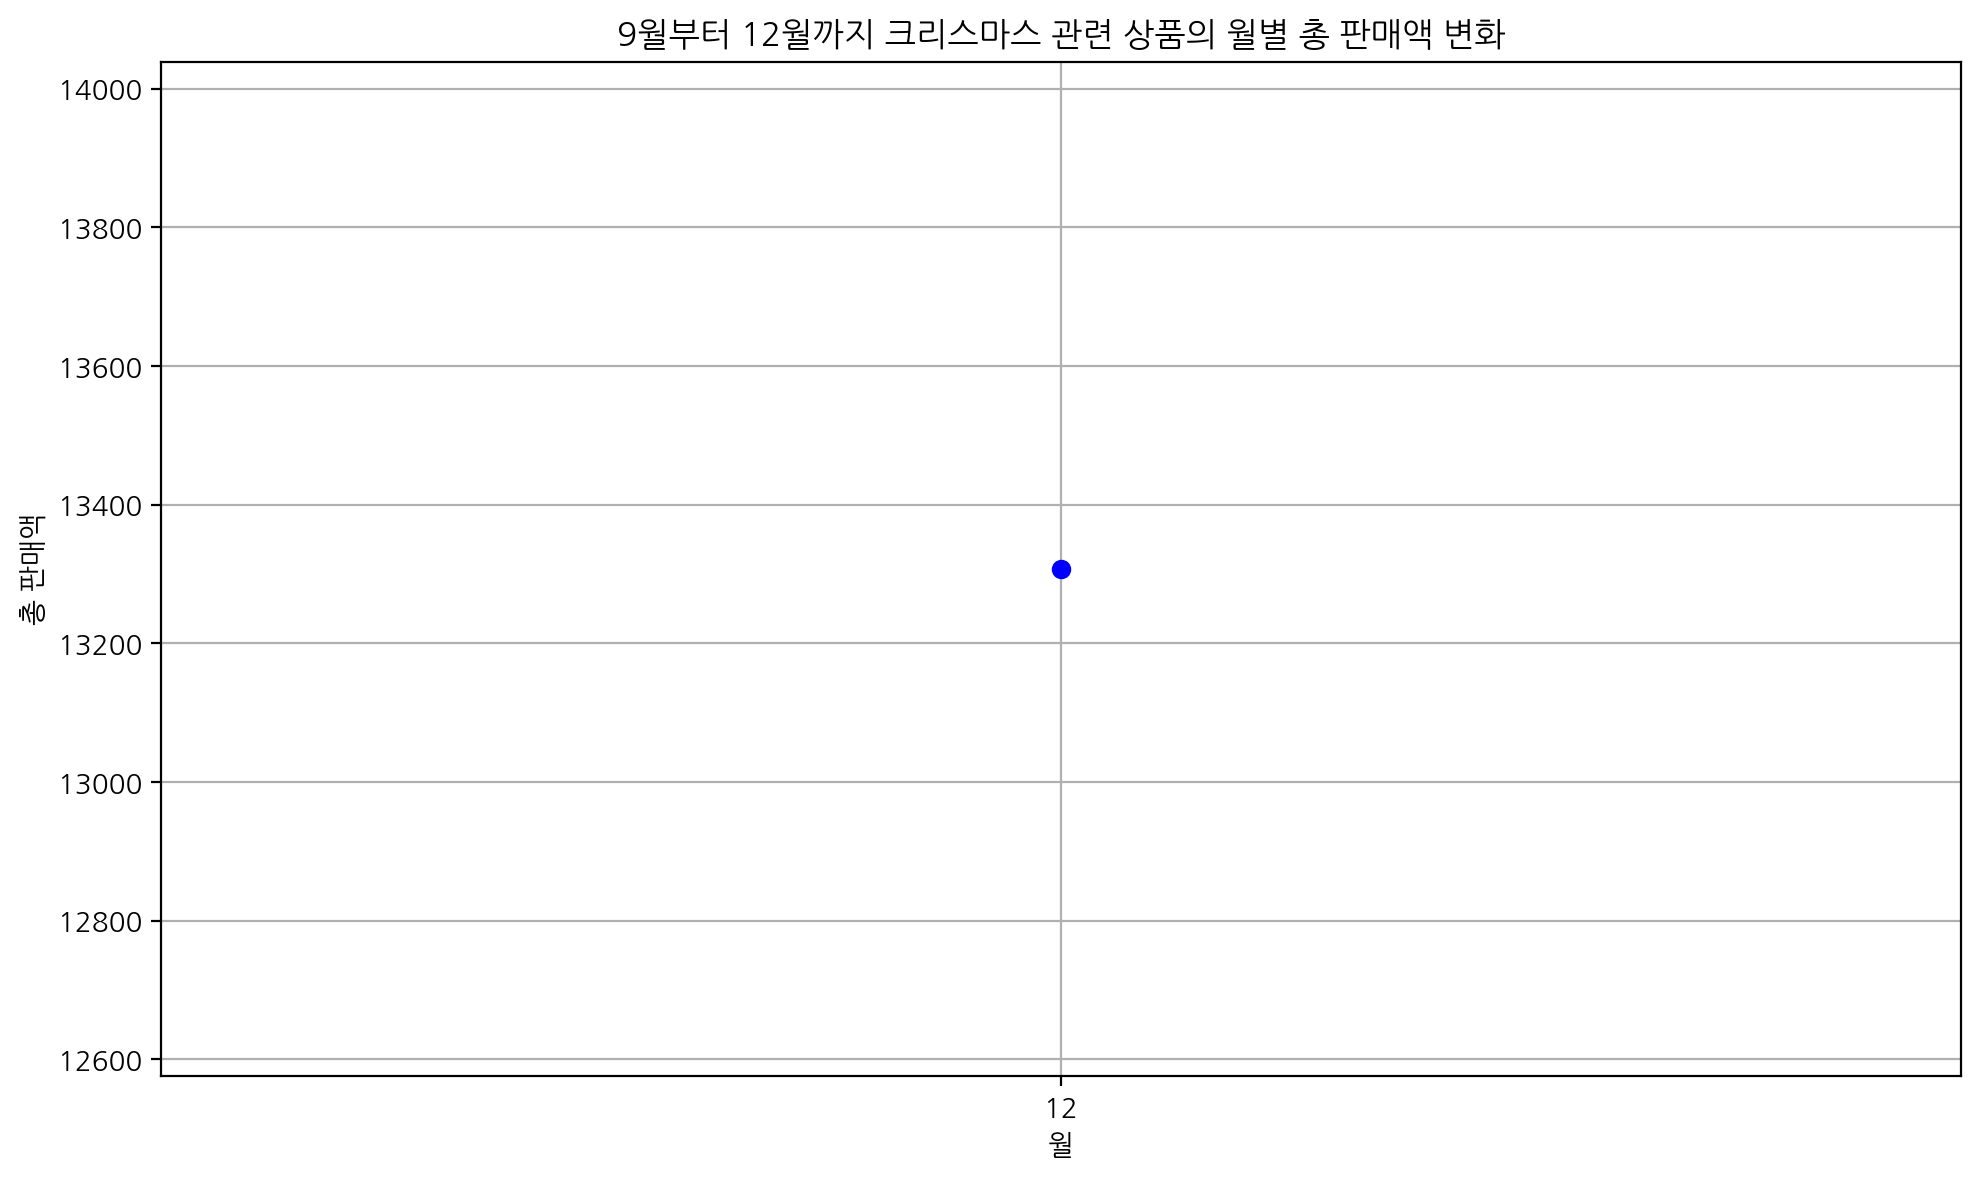

In [62]:
# # 크리스마스 관련 상품의 판매가 언제부터 올라오는지 확인 --> 데이터가 12월꺼밖에 없어서 무의미해짐
# # 기간 필터링 : 8~12월
# df_filtered = df_promotion[(df_promotion['InvoiceDate'].dt.month >= 8) & (df_promotion['InvoiceDate'].dt.month <= 12)]

# # 크리스마스 관련 제품 필터링
# df_christmas = df_filtered[df_filtered['IsChristmasProduct']]

# # 월별 총 판매액 계산
# monthly_sales = df_christmas.groupby('InvoiceMonth')['TotalPrice'].sum().reset_index()

# # 월별 총 판매액 변화 시각화
# plt.figure(figsize=(10, 6))
# plt.plot(monthly_sales['InvoiceMonth'].astype(str), monthly_sales['TotalPrice'], marker='o', linestyle='-', color='b')
# plt.title('9월부터 12월까지 크리스마스 관련 상품의 월별 총 판매액 변화')
# plt.xlabel('월')
# plt.ylabel('총 판매액')
# plt.grid(True)
# plt.tight_layout()
# plt.show()

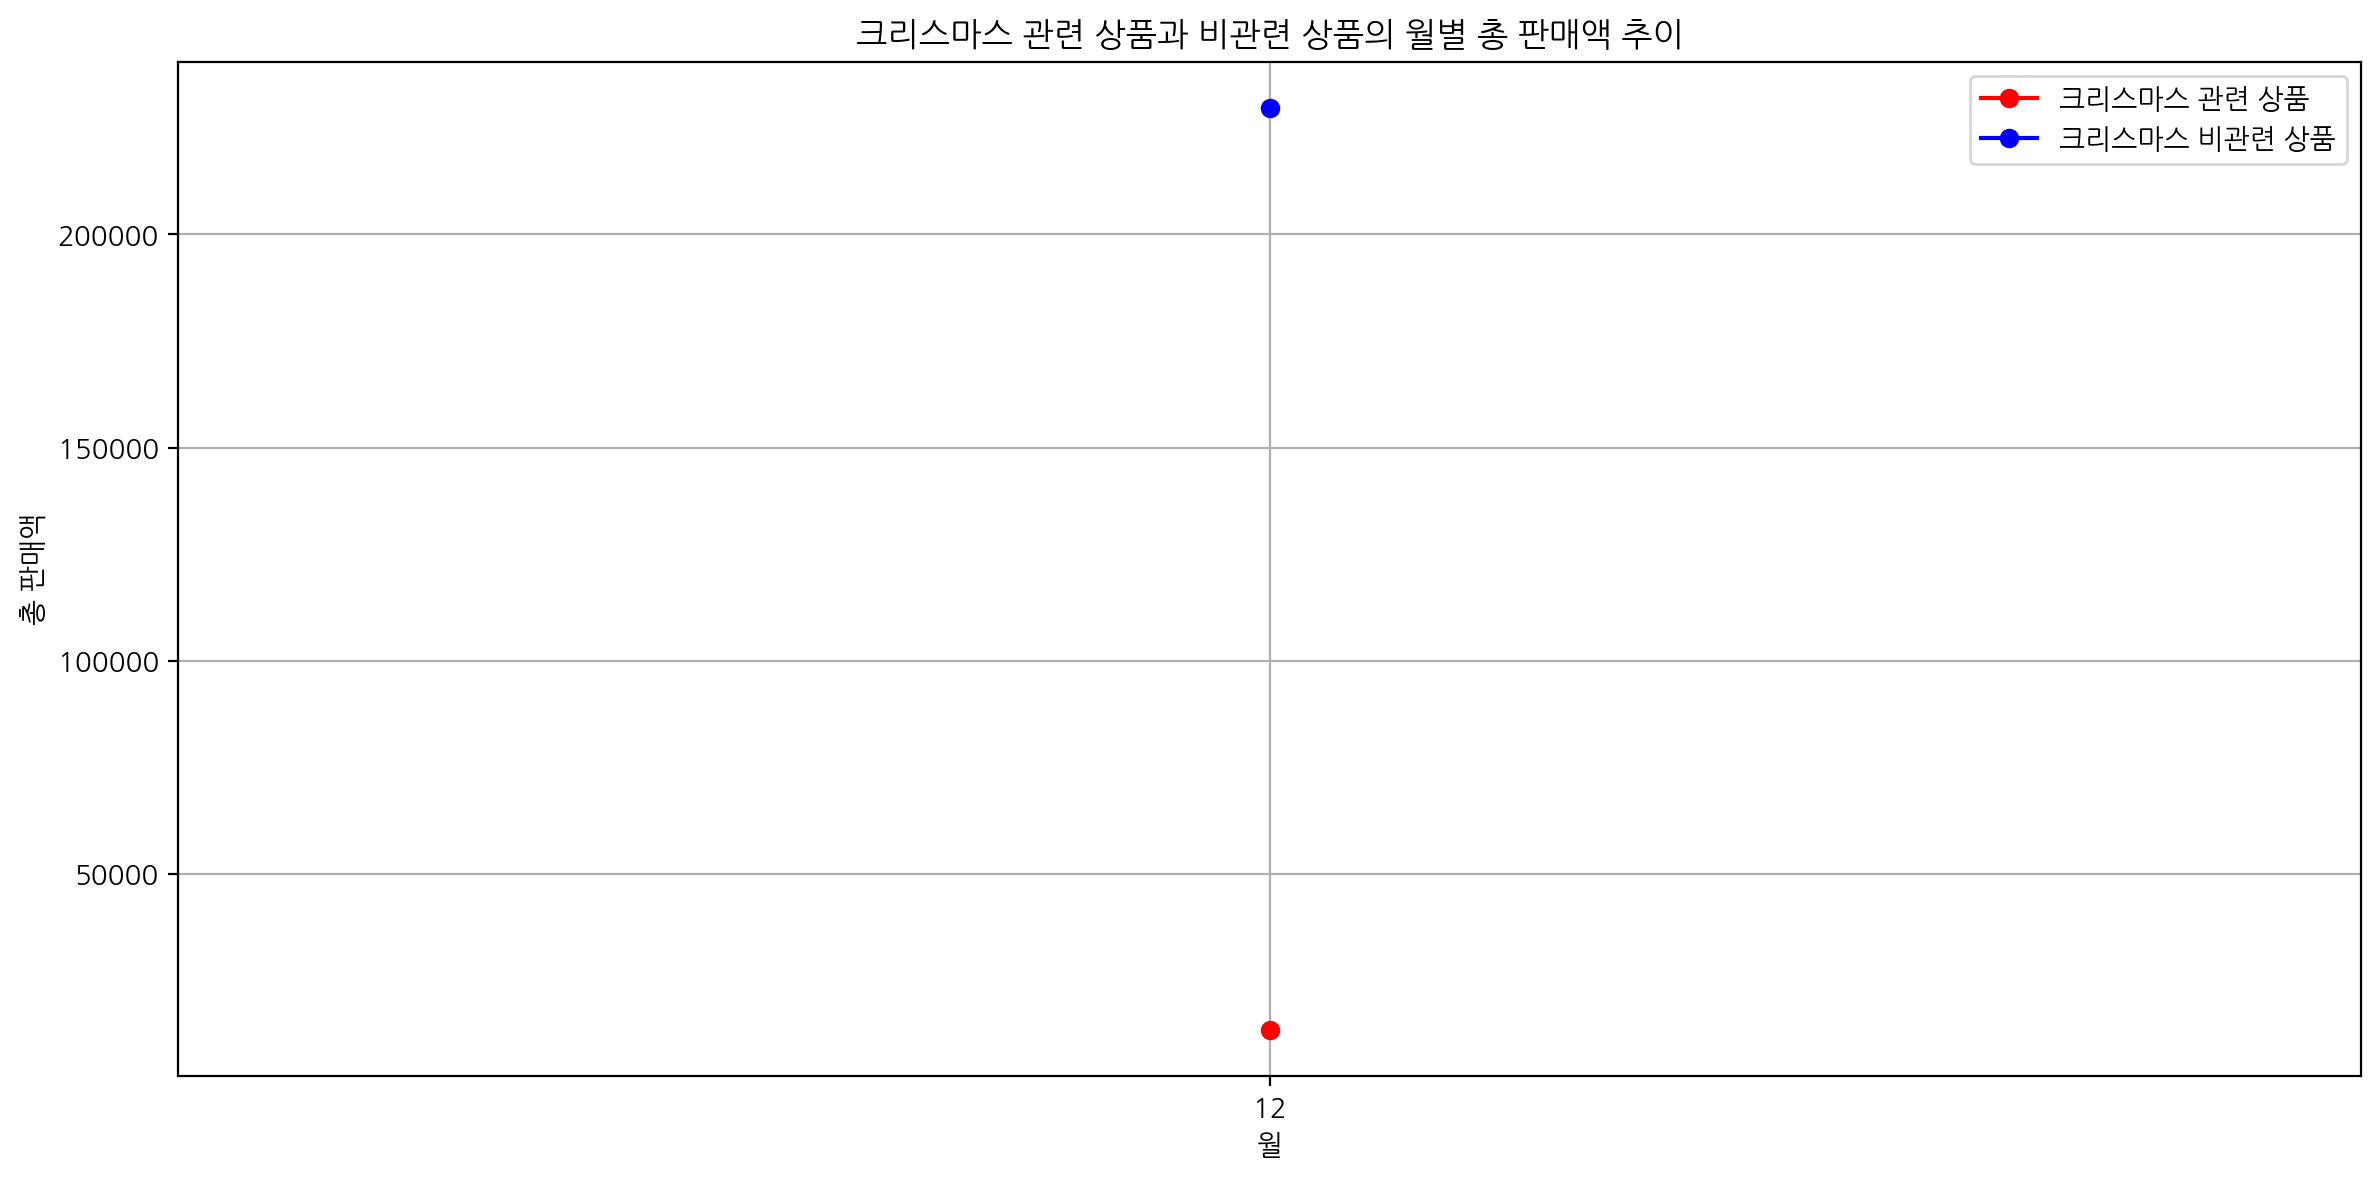

In [66]:
# # 크리스마스 관련 상품과 비관련 상품 필터링
# df_christmas = df_promotion[df_promotion['IsChristmasProduct'] == True]
# df_non_christmas = df_promotion[df_promotion['IsChristmasProduct'] == False]

# # 월별 총 판매액 계산
# monthly_sales_christmas = df_christmas.groupby('InvoiceMonth')['TotalPrice'].sum().reset_index(name='ChristmasTotalPrice')
# monthly_sales_non_christmas = df_non_christmas.groupby('InvoiceMonth')['TotalPrice'].sum().reset_index(name='NonChristmasTotalPrice')

# # 두 데이터프레임을 하나로 합침
# monthly_sales = pd.merge(monthly_sales_christmas, monthly_sales_non_christmas, on='InvoiceMonth', how='outer').fillna(0)

# # 시각화
# plt.figure(figsize=(12, 6))
# plt.plot(monthly_sales['InvoiceMonth'].astype(str), monthly_sales['ChristmasTotalPrice'], marker='o', linestyle='-', label='크리스마스 관련 상품', color='red')
# plt.plot(monthly_sales['InvoiceMonth'].astype(str), monthly_sales['NonChristmasTotalPrice'], marker='o', linestyle='-', label='크리스마스 비관련 상품', color='blue')
# plt.title('크리스마스 관련 상품과 비관련 상품의 월별 총 판매액 추이')
# plt.xlabel('월')
# plt.ylabel('총 판매액')
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()

# ✅ 크리스마스가 온라인 소매 판매에 미치는 영향 평가

(1) 크리스마스가 매출에 미치는 영향
- 크리스마스 기간의 총 판매액 평균, Q1~Q3 모두 전반적으로 높은 경향이 있으므로 해당 기간의 매출 더 강화하는 전략(ex.대형 프로모션, 추가 이벤트, 신제품 런칭 등)을 사전 준비하는 것이 좋음.

(2) 기타
- 12월 데이터뿐만 아니라 8월부터 조금 더 세부적인 데이터 확인 가능하다면, 크리스마스 관련 제품의 매출이 상승하는 시기에 맞춰 재고 준비 및 관련 프로모션 세팅
- 크리스마스에 직접적으로 연관된 아이템이 아닌 것들 중에서도 매출이 올라오는 제품이 있는지 확인 및 연계하여 추가 프로모션 개발 가능

<br><br>



---



## 미션7) 다변량 회귀분석을 수행하여 크리스마스 기간 전후와 크리스마스 관련 상품과 비관련 상품 간의 판매량(Quantity) 차이를 'UnitPrice'와 'Country'와 함께 분석합니다.

* 판매량(Quantity)을 종속변수로 하여, 크리스마스 관련 상품 여부(IsChristmasProduct), 단가(UnitPrice), 국가(Country) 등을 독립변수로 포함하는 다변량 선형 회귀모델을 구축합니다.
* statsmodels 라이브러리(statsmodels.formula.api 의 ols)를 사용하여 모델을 구축하고, 결과를 해석합니다.
* 분석 결과를 해석하고, 이를 바탕으로 크리스마스 시즌 판매 전략에 대한 권장 사항을 제시합니다.
* 분석 과정과 결과, 그리고 비즈니스 전략에 대한 권장 사항을 포함하는 보고서를 작성합니다.
* 다음 주어진 코드를 활용합니다.

```python
from statsmodels.formula.api import ols

# ols.summary()를 이용해 볼 수 있습니다.
```

In [82]:
import statsmodels.formula.api as smf

# 다변량 회귀분석을 위한 데이터 준비
# C()를 사용해 범주형 변수로 지정
df_promotion['IsChristmasPeriod'] = df_promotion['IsChristmasPeriod'].astype(int)
df_promotion['IsChristmasProduct'] = df_promotion['IsChristmasProduct'].astype(int)

# 다변량 회귀분석 모델 구축
model = smf.ols(formula='Quantity ~ IsChristmasProduct + UnitPrice + C(Country)', data=df_promotion).fit()

# 결과 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Quantity   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.161
Method:                 Least Squares   F-statistic:                     187.3
Date:                Tue, 16 Jul 2024   Prob (F-statistic):               0.00
Time:                        08:39:46   Log-Likelihood:                -80009.
No. Observations:               22253   AIC:                         1.601e+05
Df Residuals:                   22229   BIC:                         1.603e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

# ✅
# 결과 요약

(1) 요약
- 종속변수: Quantity (판매량)
- 독립변수: IsChristmasProduct, UnitPrice, Country
- R-squared: 0.162 (모델이 전체 데이터 변동의 16.2%를 설명함)
- Adj. R-squared: 0.161 (조정된 결정계수, 설명력을 보정한 값)
- F-statistic: 187.3 (모델의 전체 유의성 테스트에서 매우 유의미함, p-값 < 0.05)

(2) 주요 변수 분석
- Intercept (절편): 16.6834 (모든 독립변수가 0일 때 예상 판매량)
- IsChristmasProduct: 0.4365, p-값 0.073 (크리스마스 관련 상품의 판매량은 비관련 상품보다 평균적으로 0.4365 증가하지만, 유의수준 0.05에서 통계적으로 유의미하지 않음)
- UnitPrice: -1.9177, p-값 0.000 (단가가 1 증가할 때 판매량은 평균적으로 1.9177 감소, 통계적으로 매우 유의미함)

(3) 국가별 분석
- Finland: 17.7844, p-값 0.000 (핀란드의 판매량은 다른 국가에 비해 평균적으로 17.7844 증가, 통계적으로 매우 유의미함)
- Japan: 12.5816, p-값 0.000 (일본의 판매량은 다른 국가에 비해 평균적으로 12.5816 증가, 통계적으로 매우 유의미함)
- Norway: 8.2666, p-값 0.000 (노르웨이의 판매량은 다른 국가에 비해 평균적으로 8.2666 증가, 통계적으로 매우 유의미함)
- Netherlands: -9.6779, p-값 0.001 (네덜란드의 판매량은 다른 국가에 비해 평균적으로 9.6779 감소, 통계적으로 유의미함)
- Spain: -7.3060, p-값 0.001 (스페인의 판매량은 다른 국가에 비해 평균적으로 7.3060 감소, 통계적으로 유의미함)
- United Kingdom: -5.3617, p-값 0.005 (영국의 판매량은 다른 국가에 비해 평균적으로 5.3617 감소, 통계적으로 유의미함)

# 결과 해석
- 단가가 높을수록 판매량은 감소합니다. 이는 가격 민감도가 높은 상품일 가능성이 있음을 시사합니다.
- 크리스마스 관련 상품 여부가 판매량에 미치는 영향은 양수지만, 통계적으로 유의미하지 않습니다. 크리스마스 관련 상품 프로모션이 더 필요함을 시사합니다.
- 특정 국가(Finland, Japan, Norway)는 다른 국가에 비해 판매량이 유의미하게 높습니다. 이들 국가를 타겟으로 한 마케팅 전략이 필요합니다.
반면, Netherlands, Spain, United Kingdom은 판매량이 유의미하게 낮습니다. 이들 국가에서의 판매 전략을 재검토해야 합니다.

# 비즈니스 전략 권장 사항
(1) 크리스마스 관련 상품 프로모션 강화:
- 크리스마스 관련 상품의 판매를 증진시키기 위한 특별 프로모션을 개발합니다.
- 대상 고객을 세분화하여 크리스마스 상품에 관심이 높은 고객 세그먼트를 식별하고, 이들을 대상으로 한 마케팅 캠페인을 실행합니다.
(2) 단가 조정:
- 단가가 높은 상품의 판매량이 낮기 때문에, 가격 전략을 재검토하여 최적의 가격을 설정합니다.
- 단가가 낮은 상품에 대한 홍보를 강화하여 판매량을 증가시킵니다.
(3) 국가별 맞춤 전략:
- Finland, Japan, Norway와 같은 판매량이 높은 국가에 집중하여 프로모션을 강화합니다.
- 판매량이 낮은 국가에서는 현지화된 마케팅 전략을 통해 판매량을 개선합니다.
(4) 재고 및 공급망 관리:
- 크리스마스 시즌에 대한 수요 예측을 바탕으로 재고 수준을 최적화합니다.
- 공급망 효율화를 통해 시즌별 수요 변화에 따라 공급망을 조정하여 비용을 최소화하고, 고객 만족도를 높입니다.
(5) 상품 포트폴리오 다양화:
- 크리스마스 관련 상품뿐만 아니라, 다른 시즌 상품에도 주목하여 상품 포트폴리오를 다양화합니다.
- 프로모션과 상품 가격 전략이 판매에 미치는 영향을 분석하여 미래의 프로모션 및 가격 전략을 최적화합니다.

<br>
<br>


---



## 미션8) 온라인 소매 데이터를 사용하여 고객이 특정 상품을 구매할지 여부를 예측합니다.
이 예측 모델을 사용하여 타겟 마케팅 전략을 수립하고, 재고 관리를 최적화합니다. 고객의 특정 상품 구매 여부(구매/미구매)를 예측하는 이진 분류 모델을 구축합니다.


1) 타겟 변수 생성: 'WHITE HANGING HEART T-LIGHT HOLDER' 상품을 구매했는지 여부를 나타내는 이진 타겟 변수(0: 미구매, 1: 구매)를 생성합니다.\
2) 특성(feature) 선택: 구매 예측에 영향을 미칠 수 있는 변수들을 선택합니다. 예를 들어, 'UnitPrice', 'Quantity', 'CustomerID', 'Country' 등이 될 수 있습니다.\
3) 범주형 변수 처리: 'Country'와 같은 범주형 변수를 숫자로 변환합니다. 원-핫 인코딩 등을 사용할 수 있습니다.\
4) 데이터 분할: 모델 학습을 위해 데이터를 훈련 세트와 테스트 세트로 분할합니다.\
5) 로지스틱 회귀 모델 생성 및 학습합니다.\
6) 모델을 평가 합니다.